<a href="https://colab.research.google.com/github/dmburns1729/Project-2/blob/main/Assignment_Project_2_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Project 2 - Part 3

---



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from imblearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import set_config
set_config(display='diagram')

from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay, f1_score, accuracy_score, classification_report)

from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
smote = SMOTE()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/Car_Insurance_Claim.csv')
df.head()

ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0  569520    65+  female  majority               0-9y  high school   
1  750365  16-25    male  majority               0-9y         none   
2  199901  16-25  female  majority               0-9y  high school   
3  478866  16-25    male  majority               0-9y   university   
4  731664  26-39    male  majority             10-19y         none   

          INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  \
0    upper class      0.629027                1.0   after 2015      0.0   
1        poverty      0.357757                0.0  before 2015      0.0   
2  working class      0.493146                1.0  before 2015      0.0   
3  working class      0.206013                1.0  before 2015      0.0   
4  working class      0.388366                1.0  before 2015      0.0   

   CHILDREN  POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  \
0       1.0        10238         12000.0        sedan                    0   
1       0.0        10238         16000.0        sedan                    0   
2       0.0        10238         11000.0        sedan                    0   
3       1.0        32765         11000.0        sedan                    0   
4       0.0        32765         12000.0        sedan                    2   

   DUIS  PAST_ACCIDENTS  OUTCOME  
0     0               0      0.0  
1     0               0      1.0  
2     0               0      0.0  
3     0               0      0.0  
4     0               1      1.0

In [4]:
df['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [5]:
df_clean=df.copy()

In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [7]:
df_clean.duplicated().sum()

0

In [8]:
#Drop unneeded ID column
df_clean = df_clean.drop(columns = 'ID')


In [9]:
df_clean.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [10]:
df_clean['CREDIT_SCORE'].value_counts()

0.629027    1
0.618094    1
0.396540    1
0.578306    1
0.633275    1
           ..
0.309272    1
0.847325    1
0.432080    1
0.527041    1
0.435225    1
Name: CREDIT_SCORE, Length: 9018, dtype: int64

In [11]:
df_clean['ANNUAL_MILEAGE'].value_counts()

11000.0    1253
12000.0    1218
13000.0    1137
10000.0    1071
14000.0     894
9000.0      856
15000.0     632
8000.0      557
16000.0     419
7000.0      322
17000.0     246
6000.0      165
18000.0     103
5000.0       65
19000.0      48
4000.0       27
20000.0      13
3000.0       10
21000.0       3
2000.0        2
22000.0       2
Name: ANNUAL_MILEAGE, dtype: int64

In [12]:
df_clean['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [13]:
# Check categorical columns for consistancy
# select only object columns
categoricals = df_clean.select_dtypes(include='object')

# check value counts for each object column
for col in categoricals.columns:
  print(col)
  print(categoricals[col].value_counts(), '\n')

AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64 

GENDER
female    5010
male      4990
Name: GENDER, dtype: int64 

RACE
majority    9012
minority     988
Name: RACE, dtype: int64 

DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64 

EDUCATION
high school    4157
university     3928
none           1915
Name: EDUCATION, dtype: int64 

INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64 

VEHICLE_YEAR
before 2015    6967
after 2015     3033
Name: VEHICLE_YEAR, dtype: int64 

VEHICLE_TYPE
sedan         9523
sports car     477
Name: VEHICLE_TYPE, dtype: int64 



In [14]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

age_ordinal = {'16-25':'0', '26-39':'1','40-64':'2','65+':'3' }
df_clean['AGE'] = df_clean['AGE'].replace(age_ordinal)
df_clean['AGE'].value_counts()

1    3063
2    2931
0    2016
3    1990
Name: AGE, dtype: int64

In [15]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

gender_ordinal = {'male':'0', 'female':'1' }
df_clean['GENDER'] = df_clean['GENDER'].replace(gender_ordinal)
df_clean['GENDER'].value_counts()

1    5010
0    4990
Name: GENDER, dtype: int64

In [16]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

race_ordinal = {'majority':'0', 'minority':'1' }
df_clean['RACE'] = df_clean['RACE'].replace(race_ordinal)
df_clean['RACE'].value_counts()

0    9012
1     988
Name: RACE, dtype: int64

In [17]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

experience_ordinal = {'0-9y':'0', '10-19y':'1' , '20-29y':'2', '30y+':'3'}
df_clean['DRIVING_EXPERIENCE'] = df_clean['DRIVING_EXPERIENCE'].replace(experience_ordinal)
df_clean['DRIVING_EXPERIENCE'].value_counts()




0    3530
1    3299
2    2119
3    1052
Name: DRIVING_EXPERIENCE, dtype: int64

In [18]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

# I am going to assume 'none' means no eduction not 'missing value'

education_ordinal = {'none':'0', 'high school':'1' , 'university':'2'}
df_clean['EDUCATION'] = df_clean['EDUCATION'].replace(education_ordinal)
df_clean['EDUCATION'].value_counts()


#EDUCATION
#high school    4157
#university     3928
#none           1915
#ame: EDUCATION, dtype: int64 



1    4157
2    3928
0    1915
Name: EDUCATION, dtype: int64

In [19]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

income_ordinal = {'poverty':'0', 'working class':'1' , 'middle class':'2', 'upper class':'3'}
df_clean['INCOME'] = df_clean['INCOME'].replace(income_ordinal)
df_clean['INCOME'].value_counts()


3    4336
2    2138
0    1814
1    1712
Name: INCOME, dtype: int64

In [20]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

vehicle_year_ordinal = {'before 2015':'0', 'after 2015':'1'}
df_clean['VEHICLE_YEAR'] = df_clean['VEHICLE_YEAR'].replace(vehicle_year_ordinal)
df_clean['VEHICLE_YEAR'].value_counts()

0    6967
1    3033
Name: VEHICLE_YEAR, dtype: int64

In [21]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

vehicle_type_ordinal = {'sedan':'0', 'sports car':'1'}
df_clean['VEHICLE_TYPE'] = df_clean['VEHICLE_TYPE'].replace(vehicle_type_ordinal)
df_clean['VEHICLE_TYPE'].value_counts()

0    9523
1     477
Name: VEHICLE_TYPE, dtype: int64

In [22]:
df_clean['VEHICLE_OWNERSHIP'].value_counts()

1.0    6970
0.0    3030
Name: VEHICLE_OWNERSHIP, dtype: int64

In [23]:
df_clean['MARRIED'].value_counts()

0.0    5018
1.0    4982
Name: MARRIED, dtype: int64

In [24]:
df_clean['CHILDREN'].value_counts()

1.0    6888
0.0    3112
Name: CHILDREN, dtype: int64

In [25]:
df_clean['ANNUAL_MILEAGE'].value_counts()

 

11000.0    1253
12000.0    1218
13000.0    1137
10000.0    1071
14000.0     894
9000.0      856
15000.0     632
8000.0      557
16000.0     419
7000.0      322
17000.0     246
6000.0      165
18000.0     103
5000.0       65
19000.0      48
4000.0       27
20000.0      13
3000.0       10
21000.0       3
2000.0        2
22000.0       2
Name: ANNUAL_MILEAGE, dtype: int64

In [26]:
df_clean['OUTCOME'].value_counts()


0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [27]:
# Inbalanced data!  May need to address

In [28]:
df_clean['AGE'] = df_clean['AGE'].astype('int64')
df_clean['GENDER'] = df_clean['GENDER'].astype('int64')
df_clean['RACE'] = df_clean['RACE'].astype('int64')
df_clean['DRIVING_EXPERIENCE'] = df_clean['DRIVING_EXPERIENCE'].astype('int64')
df_clean['EDUCATION'] = df_clean['EDUCATION'].astype('int64')
df_clean['INCOME'] = df_clean['INCOME'].astype('int64')
df_clean['VEHICLE_YEAR'] = df_clean['VEHICLE_YEAR'].astype('int64')
df_clean['VEHICLE_TYPE'] = df_clean['VEHICLE_TYPE'].astype('int64')
df_clean['VEHICLE_OWNERSHIP'] = df_clean['VEHICLE_OWNERSHIP'].astype('int64')
df_clean['MARRIED'] = df_clean['VEHICLE_OWNERSHIP'].astype('int64')
df_clean['CHILDREN'] = df_clean['CHILDREN'].astype('int64')
df_clean['OUTCOME'] = df_clean['OUTCOME'].astype('int64')

df_clean['POSTAL_CODE'] = df_clean['POSTAL_CODE'].astype('object')


df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  int64  
 1   GENDER               10000 non-null  int64  
 2   RACE                 10000 non-null  int64  
 3   DRIVING_EXPERIENCE   10000 non-null  int64  
 4   EDUCATION            10000 non-null  int64  
 5   INCOME               10000 non-null  int64  
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  int64  
 8   VEHICLE_YEAR         10000 non-null  int64  
 9   MARRIED              10000 non-null  int64  
 10  CHILDREN             10000 non-null  int64  
 11  POSTAL_CODE          10000 non-null  object 
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  int64  
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

In [29]:
df['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [30]:
df_clean

AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0       3       1     0                   0          1       3      0.629027   
1       0       0     0                   0          0       0      0.357757   
2       0       1     0                   0          1       1      0.493146   
3       0       0     0                   0          2       1      0.206013   
4       1       0     0                   1          0       1      0.388366   
...   ...     ...   ...                 ...        ...     ...           ...   
9995    1       1     0                   1          2       3      0.582787   
9996    1       1     0                   1          0       2      0.522231   
9997    1       0     0                   0          1       2      0.470940   
9998    1       1     0                   1          1       0      0.364185   
9999    1       1     0                   0          0       1      0.435225   

      VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN POSTAL_CODE  \
0                     1             1        1         1       10238   
1                     0             0        0         0       10238   
2                     1             0        1         0       10238   
3                     1             0        1         1       32765   
4                     1             0        1         0       32765   
...                 ...           ...      ...       ...         ...   
9995                  1             0        1         0       10238   
9996                  1             1        1         1       32765   
9997                  1             0        1         1       10238   
9998                  0             0        0         1       10238   
9999                  1             0        1         1       10238   

      ANNUAL_MILEAGE  VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0            12000.0             0                    0     0               0   
1            16000.0             0                    0     0               0   
2            11000.0             0                    0     0               0   
3            11000.0             0                    0     0               0   
4            12000.0             0                    2     0               1   
...              ...           ...                  ...   ...             ...   
9995         16000.0             0                    0     0               1   
9996             NaN             0                    1     0               0   
9997         14000.0             0                    0     0               0   
9998         13000.0             0                    2     0               1   
9999         13000.0             0                    0     0               0   

      OUTCOME  
0           0  
1           1  
2           0  
3           0  
4           1  
...       ...  
9995        0  
9996        0  
9997        0  
9998        1  
9999        0  

[10000 rows x 18 columns]

In [31]:
df_clean.describe()

AGE        GENDER          RACE  DRIVING_EXPERIENCE  \
count  10000.000000  10000.000000  10000.000000        10000.000000   
mean       1.489500      0.501000      0.098800            1.069300   
std        1.025278      0.500024      0.298408            0.990452   
min        0.000000      0.000000      0.000000            0.000000   
25%        1.000000      0.000000      0.000000            0.000000   
50%        1.000000      1.000000      0.000000            1.000000   
75%        2.000000      1.000000      0.000000            2.000000   
max        3.000000      1.000000      1.000000            3.000000   

         EDUCATION        INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP  \
count  10000.00000  10000.000000   9018.000000       10000.000000   
mean       1.20130      1.899600      0.515813           0.697000   
std        0.73745      1.149109      0.137688           0.459578   
min        0.00000      0.000000      0.053358           0.000000   
25%        1.00000      1.000000      0.417191           0.000000   
50%        1.00000      2.000000      0.525033           1.000000   
75%        2.00000      3.000000      0.618312           1.000000   
max        2.00000      3.000000      0.960819           1.000000   

       VEHICLE_YEAR       MARRIED      CHILDREN  ANNUAL_MILEAGE  VEHICLE_TYPE  \
count  10000.000000  10000.000000  10000.000000     9043.000000  10000.000000   
mean       0.303300      0.697000      0.688800    11697.003207      0.047700   
std        0.459707      0.459578      0.463008     2818.434528      0.213141   
min        0.000000      0.000000      0.000000     2000.000000      0.000000   
25%        0.000000      0.000000      0.000000    10000.000000      0.000000   
50%        0.000000      1.000000      1.000000    12000.000000      0.000000   
75%        1.000000      1.000000      1.000000    14000.000000      0.000000   
max        1.000000      1.000000      1.000000    22000.000000      1.000000   

       SPEEDING_VIOLATIONS         DUIS  PAST_ACCIDENTS       OUTCOME  
count         10000.000000  10000.00000    10000.000000  10000.000000  
mean              1.482900      0.23920        1.056300      0.313300  
std               2.241966      0.55499        1.652454      0.463858  
min               0.000000      0.00000        0.000000      0.000000  
25%               0.000000      0.00000        0.000000      0.000000  
50%               0.000000      0.00000        0.000000      0.000000  
75%               2.000000      0.00000        2.000000      1.000000  
max              22.000000      6.00000       15.000000      1.000000

In [32]:
df_clean['SPEEDING_VIOLATIONS'].value_counts()

# Look at speedy with 22 speeding tickets!

0     5028
1     1544
2     1161
3      830
4      530
5      319
6      188
7      140
8       75
10      50
9       49
11      30
12      20
13      12
15       8
14       5
16       4
17       3
19       2
18       1
22       1
Name: SPEEDING_VIOLATIONS, dtype: int64

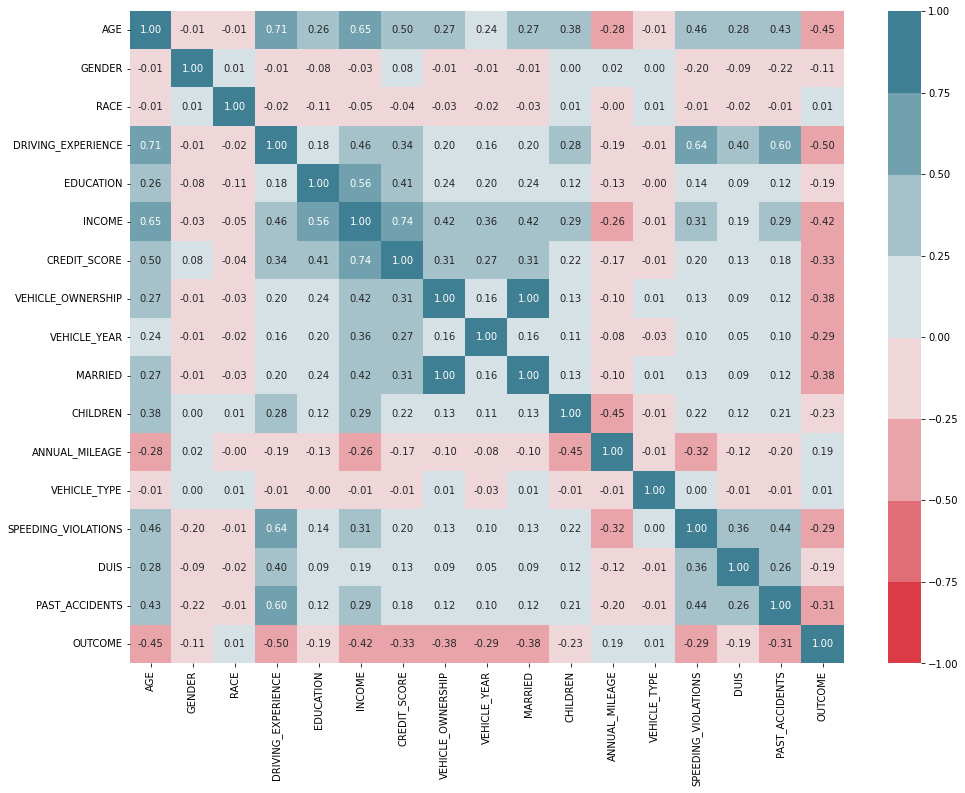

In [33]:
corr = df_clean.corr()
plt.figure(figsize = (16,12));
sns.heatmap(corr, cmap=sns.diverging_palette(10, 220, n=8), annot = True, vmin=-1, vmax=1, center=0,fmt='.2f');

# Analysis of the correlation heat map

There are a few interesting facts about the correlations in the data.  First, age and driving experience are negatively correlated with crashing your car.  Younger, less experienced drivers crash more often. Not a big surprise. 

Interestingly, as you get older, your income, credit score, chance of being married, children, etc all go up.  However, so does your number of speeding violations, DUIs, and past accidents.  I guess this makes sense if this is a lifetime record but the insurance company really should limit these items to a limited look back - i.e. violations drop off your record after a certain amount of years.  It doesn't look like that is what they did here.  However, just the fact that some people have fewer accidents when they get older should help us out.  

Gender, race, and vehicle type seem to have little correlation with wrecking your car.  

CREDIT_SCORE is highly correlated with income. There are also missing values for CREDIT_SCORE.  For the regression and clustering, I will impute the values by grouping by income.  Of course, to prevent data leakage, I will do this **after** the test/train split.

Annual mileage is weakly correlations with a number of factors and also has missing values.  I am just going to impute it based on the mean.  As with CREDIT_SCORE I will impute the values after the split. 

In [34]:
df_clean

AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0       3       1     0                   0          1       3      0.629027   
1       0       0     0                   0          0       0      0.357757   
2       0       1     0                   0          1       1      0.493146   
3       0       0     0                   0          2       1      0.206013   
4       1       0     0                   1          0       1      0.388366   
...   ...     ...   ...                 ...        ...     ...           ...   
9995    1       1     0                   1          2       3      0.582787   
9996    1       1     0                   1          0       2      0.522231   
9997    1       0     0                   0          1       2      0.470940   
9998    1       1     0                   1          1       0      0.364185   
9999    1       1     0                   0          0       1      0.435225   

      VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN POSTAL_CODE  \
0                     1             1        1         1       10238   
1                     0             0        0         0       10238   
2                     1             0        1         0       10238   
3                     1             0        1         1       32765   
4                     1             0        1         0       32765   
...                 ...           ...      ...       ...         ...   
9995                  1             0        1         0       10238   
9996                  1             1        1         1       32765   
9997                  1             0        1         1       10238   
9998                  0             0        0         1       10238   
9999                  1             0        1         1       10238   

      ANNUAL_MILEAGE  VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0            12000.0             0                    0     0               0   
1            16000.0             0                    0     0               0   
2            11000.0             0                    0     0               0   
3            11000.0             0                    0     0               0   
4            12000.0             0                    2     0               1   
...              ...           ...                  ...   ...             ...   
9995         16000.0             0                    0     0               1   
9996             NaN             0                    1     0               0   
9997         14000.0             0                    0     0               0   
9998         13000.0             0                    2     0               1   
9999         13000.0             0                    0     0               0   

      OUTCOME  
0           0  
1           1  
2           0  
3           0  
4           1  
...       ...  
9995        0  
9996        0  
9997        0  
9998        1  
9999        0  

[10000 rows x 18 columns]

In [35]:
df_viz = df_clean.copy()

In [36]:
df_viz.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [37]:
# Loop through index values of the dataframe

def fill_credit_score(data_frame):


  for ind in data_frame.index:

    x = data_frame.loc[ind, 'CREDIT_SCORE']

    if np.isnan(x) == True:

      # Create a filter to select the correct data based on AGE and INCOME

      age_filter = data_frame['AGE'] == data_frame.loc[ind, 'AGE']
      income_filter = data_frame['INCOME'] == data_frame.loc[ind, 'INCOME']
  
      mean_credit_score = round(data_frame.loc[age_filter & income_filter, 'CREDIT_SCORE'].mean(),3)

      # Assign mean_credit_score to the 'CREDIT_SCORE' column of this row
  
      data_frame.loc[ind, 'CREDIT_SCORE'] = mean_credit_score



In [38]:
fill_credit_score(df_viz)

In [39]:
# Loop through index values of the dataframe

def fill_mileage(data_frame):


  for ind in data_frame.index:

    x = data_frame.loc[ind, 'ANNUAL_MILEAGE']

    if np.isnan(x) == True:

      # Create a filter to select the correct data

      age_filter = data_frame['AGE'] == data_frame.loc[ind, 'AGE']
      children_filter = data_frame['CHILDREN'] == data_frame.loc[ind, 'CHILDREN']
      speeding_violations_filter = data_frame['SPEEDING_VIOLATIONS'] == data_frame.loc[ind, 'SPEEDING_VIOLATIONS']
  
      mean_mileage = round(data_frame.loc[age_filter & children_filter & speeding_violations_filter, 'ANNUAL_MILEAGE'].mean(),3)

      # Assign mean_mileage to the 'ANNUAL_MILEAGE' column of this row
  
      data_frame.loc[ind, 'ANNUAL_MILEAGE'] = mean_mileage

In [40]:
fill_mileage(df_viz)

In [41]:
df_viz.isna().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         2
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [42]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  int64  
 1   GENDER               10000 non-null  int64  
 2   RACE                 10000 non-null  int64  
 3   DRIVING_EXPERIENCE   10000 non-null  int64  
 4   EDUCATION            10000 non-null  int64  
 5   INCOME               10000 non-null  int64  
 6   CREDIT_SCORE         10000 non-null  float64
 7   VEHICLE_OWNERSHIP    10000 non-null  int64  
 8   VEHICLE_YEAR         10000 non-null  int64  
 9   MARRIED              10000 non-null  int64  
 10  CHILDREN             10000 non-null  int64  
 11  POSTAL_CODE          10000 non-null  object 
 12  ANNUAL_MILEAGE       9998 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  int64  
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

In [43]:
df_viz

AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0       3       1     0                   0          1       3      0.629027   
1       0       0     0                   0          0       0      0.357757   
2       0       1     0                   0          1       1      0.493146   
3       0       0     0                   0          2       1      0.206013   
4       1       0     0                   1          0       1      0.388366   
...   ...     ...   ...                 ...        ...     ...           ...   
9995    1       1     0                   1          2       3      0.582787   
9996    1       1     0                   1          0       2      0.522231   
9997    1       0     0                   0          1       2      0.470940   
9998    1       1     0                   1          1       0      0.364185   
9999    1       1     0                   0          0       1      0.435225   

      VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN POSTAL_CODE  \
0                     1             1        1         1       10238   
1                     0             0        0         0       10238   
2                     1             0        1         0       10238   
3                     1             0        1         1       32765   
4                     1             0        1         0       32765   
...                 ...           ...      ...       ...         ...   
9995                  1             0        1         0       10238   
9996                  1             1        1         1       32765   
9997                  1             0        1         1       10238   
9998                  0             0        0         1       10238   
9999                  1             0        1         1       10238   

      ANNUAL_MILEAGE  VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0          12000.000             0                    0     0               0   
1          16000.000             0                    0     0               0   
2          11000.000             0                    0     0               0   
3          11000.000             0                    0     0               0   
4          12000.000             0                    2     0               1   
...              ...           ...                  ...   ...             ...   
9995       16000.000             0                    0     0               1   
9996       11282.178             0                    1     0               0   
9997       14000.000             0                    0     0               0   
9998       13000.000             0                    2     0               1   
9999       13000.000             0                    0     0               0   

      OUTCOME  
0           0  
1           1  
2           0  
3           0  
4           1  
...       ...  
9995        0  
9996        0  
9997        0  
9998        1  
9999        0  

[10000 rows x 18 columns]

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


# Data Visualizations

Due to all of the categorical data in this dataset, making multivariate visualizations is going to be difficult.  I will choose the most relavent.

CPU times: user 3min 29s, sys: 11.4 s, total: 3min 41s
Wall time: 3min 32s


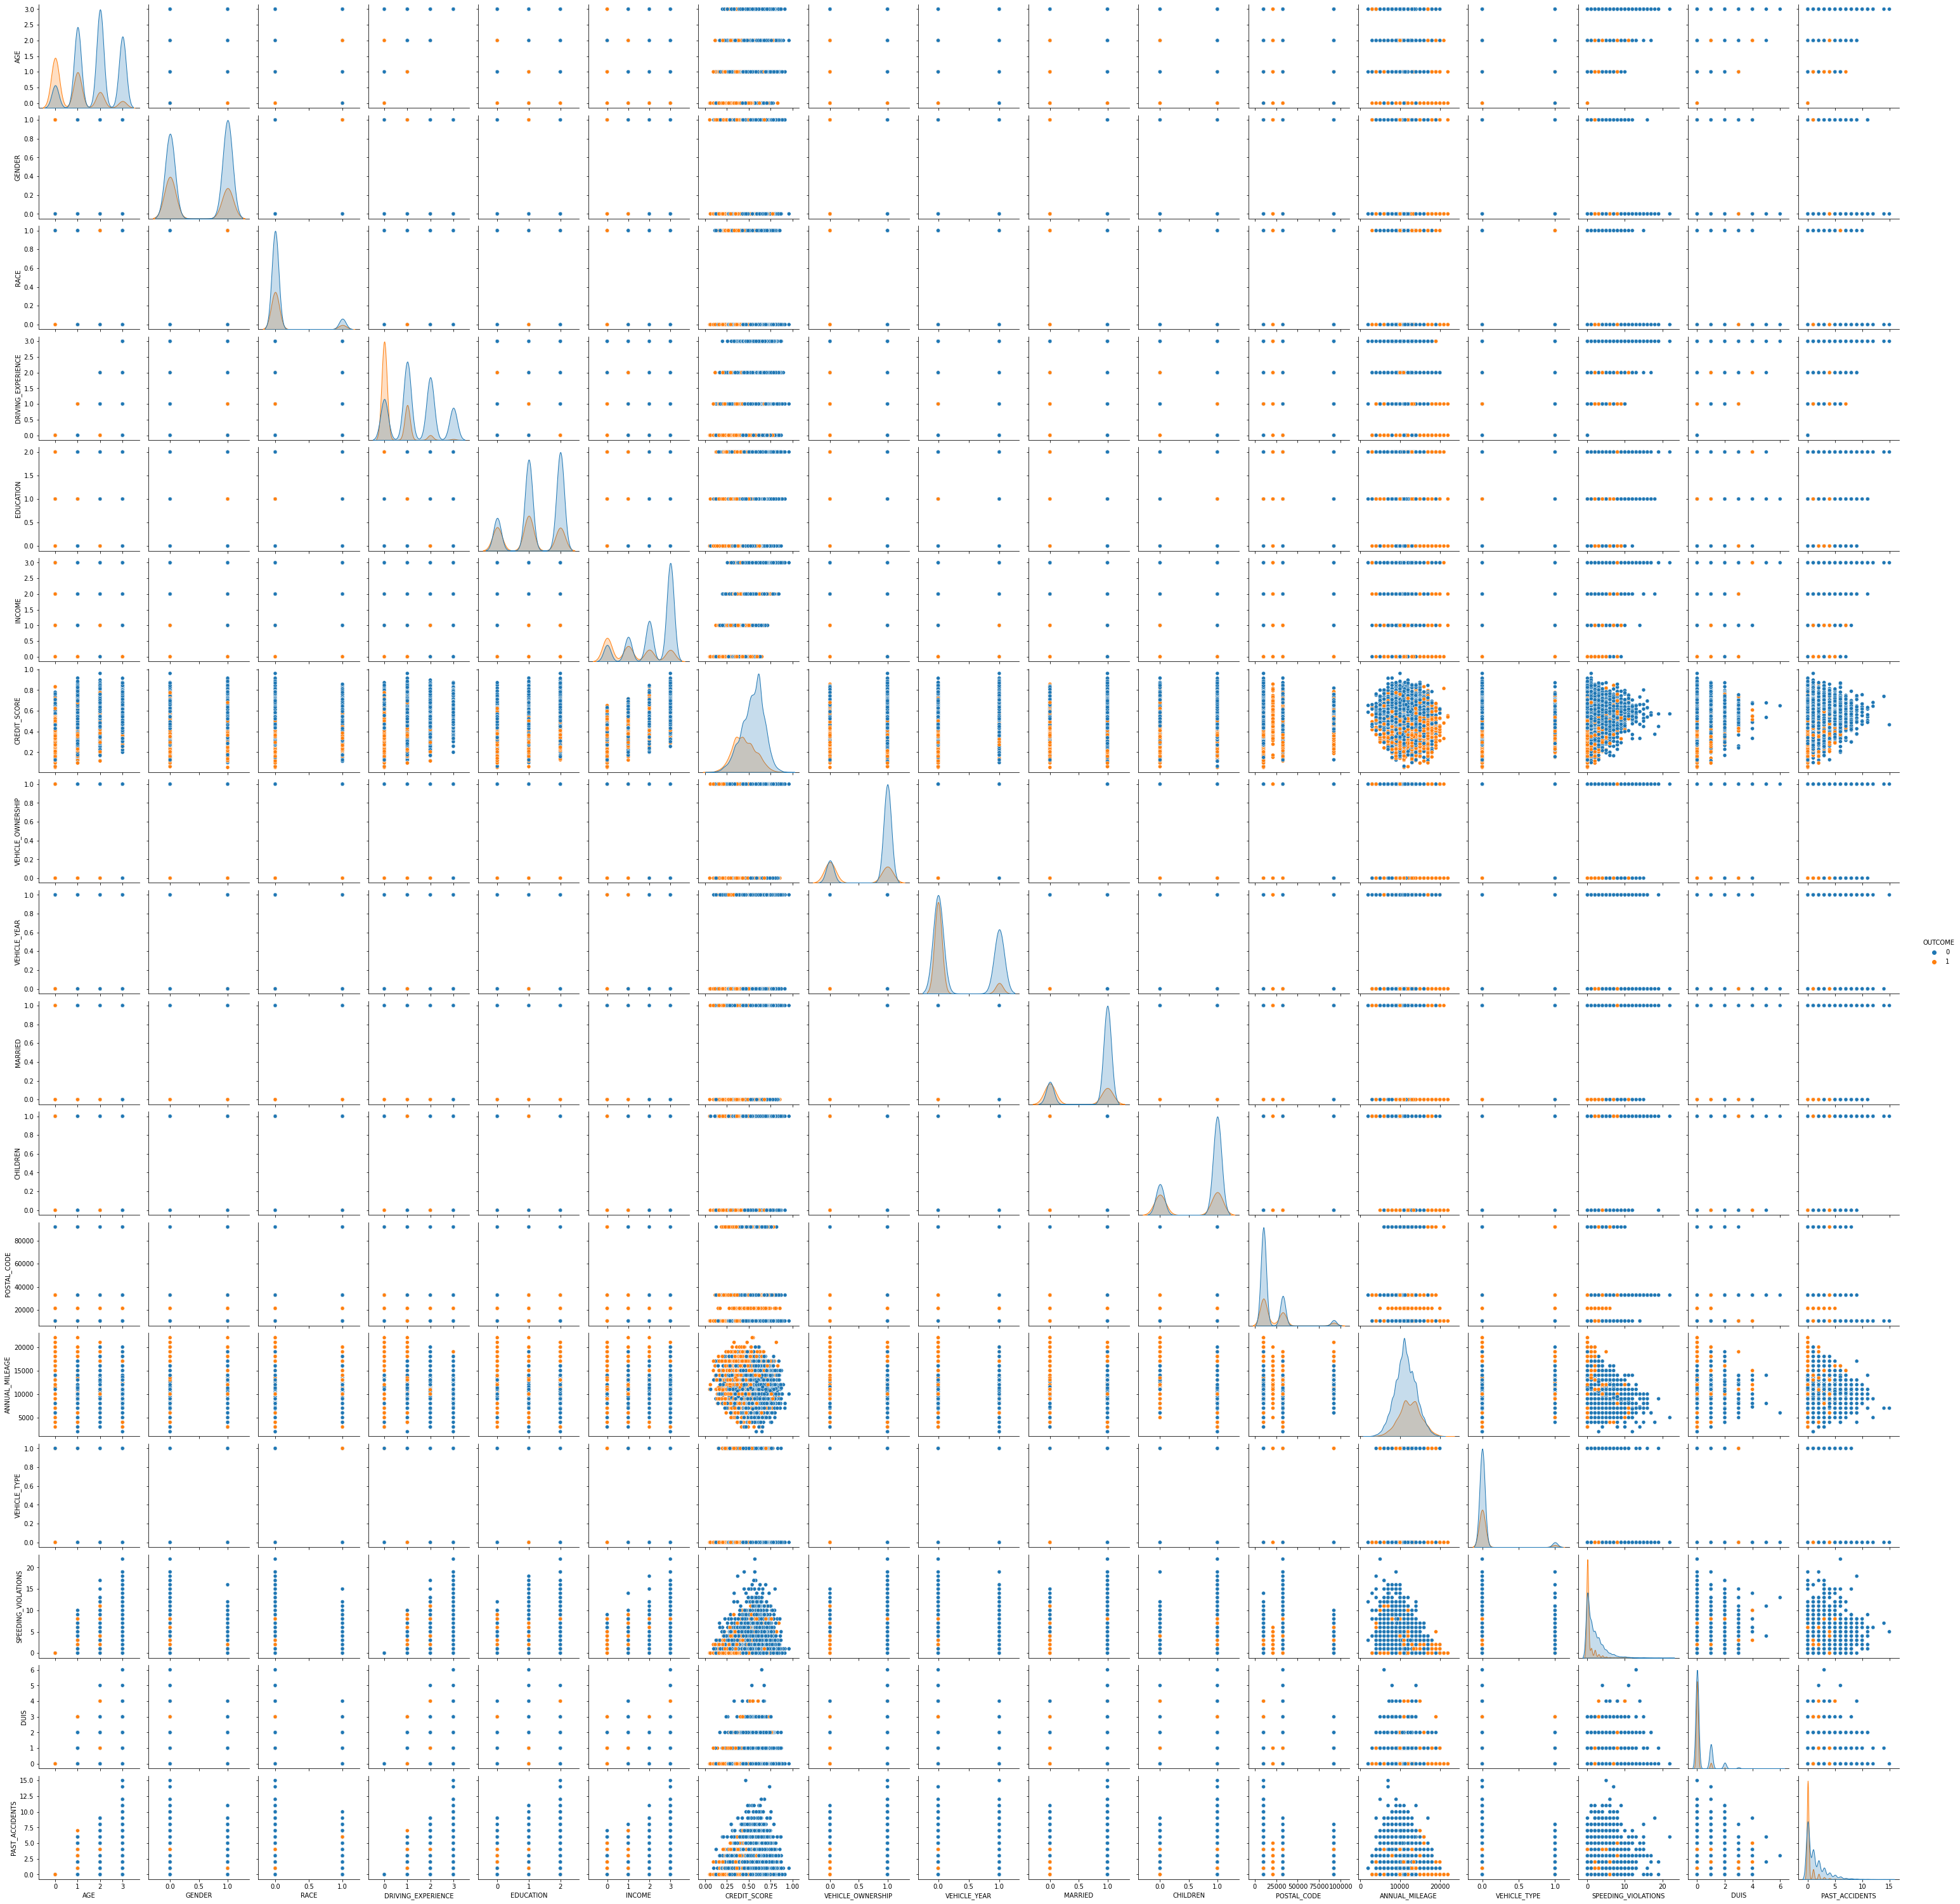

In [44]:
%%time
sns.pairplot(df_viz, hue = "OUTCOME");

# Please note that the diagonal is a univariate plot for each data set.

# Every plot not on the diagnal is a multivariate visualization




 

In [45]:
outcome = {0:'No claim', 1:'Crashed the car'}
df_viz['OUTCOME'] = df_viz['OUTCOME'].replace(outcome)
df_viz['OUTCOME'].value_counts()



No claim           6867
Crashed the car    3133
Name: OUTCOME, dtype: int64

In [46]:
age = {0:'16-25',1: '26-39', 2:'40-64', 3:'65+'}
df_viz['AGE'] = df_clean['AGE'].replace(age)
df_viz['AGE'].value_counts()

26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64

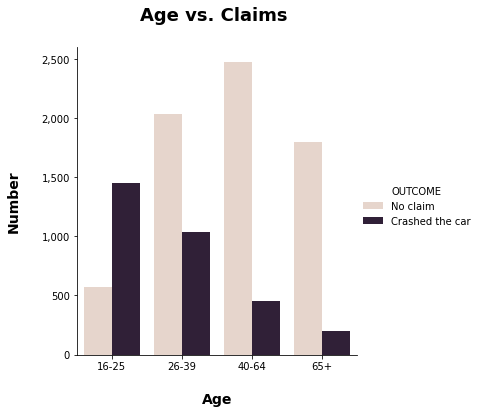

In [47]:
order_age=['16-25','26-39','40-64','65+']
sns.catplot(data=df_viz, x="AGE", kind="count",hue="OUTCOME", order=order_age, palette="ch:.10");
sns.set(style="darkgrid")
# Title and labels
plt.title('Age vs. Claims \n', fontsize = 18, weight='bold');
plt.xlabel('\nAge', fontsize = 14, weight='bold');
plt.ylabel('Number\n', fontsize = 14, weight='bold');
current_values = plt.gca().get_yticks();
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);




##Explanation of the chart

Age is highly correlated with whether or not someone is going to have an accident resulting in an insurance claim

In [48]:
exp = {0:'0-9y',1: '10-19y', 2:'20-29y', 3:'30y+'}
df_viz['DRIVING_EXPERIENCE'] = df_clean['DRIVING_EXPERIENCE'].replace(exp)
df_viz['DRIVING_EXPERIENCE'].value_counts()

0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64

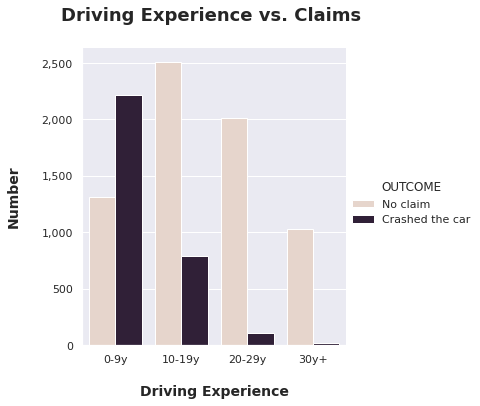

In [49]:

order_exp=['0-9y','10-19y','20-29y','30y+']
sns.catplot(data=df_viz, x="DRIVING_EXPERIENCE", kind="count",hue="OUTCOME", order=order_exp, palette="ch:.10");
sns.set(style="darkgrid")
# Title and labels
plt.title('Driving Experience vs. Claims \n', fontsize = 18, weight='bold');
plt.xlabel('\nDriving Experience', fontsize = 14, weight='bold');
plt.ylabel('Number\n', fontsize = 14, weight='bold');
current_values = plt.gca().get_yticks();
current_values = plt.gca().get_yticks();
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);

##Explanation of the chart

Driving experience is highly correlated with whether or not someone is going to have an accident resulting in an insurance claim.  Age and driving experience are also highly correlated

In [50]:
exp = {0:"Don't Own",1: 'Own'}
df_viz['VEHICLE_OWNERSHIP'] = df_clean['VEHICLE_OWNERSHIP'].replace(exp)
df_viz['VEHICLE_OWNERSHIP'].value_counts()

Own          6970
Don't Own    3030
Name: VEHICLE_OWNERSHIP, dtype: int64

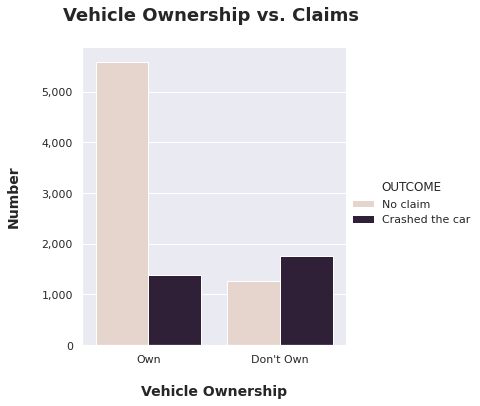

In [51]:
sns.catplot(data=df_viz, x="VEHICLE_OWNERSHIP", kind="count",hue="OUTCOME", palette="ch:.10");
sns.set(style="darkgrid")
# Title and labels
plt.title('Vehicle Ownership vs. Claims \n', fontsize = 18, weight='bold');
plt.xlabel('\nVehicle Ownership', fontsize = 14, weight='bold');
plt.ylabel('Number\n', fontsize = 14, weight='bold');

current_values = plt.gca().get_yticks();
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);


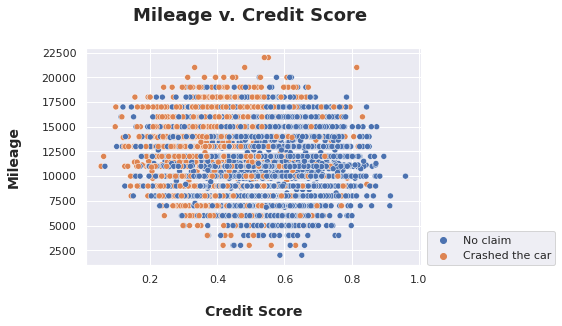

In [52]:
fig = plt.figure(1)
sns.set(style="darkgrid")
ax = sns.scatterplot(data = df_viz, x = 'CREDIT_SCORE', y = 'ANNUAL_MILEAGE', hue = 'OUTCOME')
ax.legend(bbox_to_anchor=[1,1]);


# Title and labels
plt.title('Mileage v. Credit Score \n', fontsize = 18, weight='bold');
plt.xlabel('\nCredit Score', fontsize = 14, weight='bold');
plt.ylabel('Mileage\n', fontsize = 14, weight='bold');
plt.legend(loc=(1.02,0));



# Classifying and Segmenting




In [53]:
df_ml = df_clean.copy()

In [54]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  int64  
 1   GENDER               10000 non-null  int64  
 2   RACE                 10000 non-null  int64  
 3   DRIVING_EXPERIENCE   10000 non-null  int64  
 4   EDUCATION            10000 non-null  int64  
 5   INCOME               10000 non-null  int64  
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  int64  
 8   VEHICLE_YEAR         10000 non-null  int64  
 9   MARRIED              10000 non-null  int64  
 10  CHILDREN             10000 non-null  int64  
 11  POSTAL_CODE          10000 non-null  object 
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  int64  
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

In [55]:
df_ml.head()

AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0    3       1     0                   0          1       3      0.629027   
1    0       0     0                   0          0       0      0.357757   
2    0       1     0                   0          1       1      0.493146   
3    0       0     0                   0          2       1      0.206013   
4    1       0     0                   1          0       1      0.388366   

   VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN POSTAL_CODE  \
0                  1             1        1         1       10238   
1                  0             0        0         0       10238   
2                  1             0        1         0       10238   
3                  1             0        1         1       32765   
4                  1             0        1         0       32765   

   ANNUAL_MILEAGE  VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0         12000.0             0                    0     0               0   
1         16000.0             0                    0     0               0   
2         11000.0             0                    0     0               0   
3         11000.0             0                    0     0               0   
4         12000.0             0                    2     0               1   

   OUTCOME  
0        0  
1        1  
2        0  
3        0  
4        1

In [56]:
df_ml

AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0       3       1     0                   0          1       3      0.629027   
1       0       0     0                   0          0       0      0.357757   
2       0       1     0                   0          1       1      0.493146   
3       0       0     0                   0          2       1      0.206013   
4       1       0     0                   1          0       1      0.388366   
...   ...     ...   ...                 ...        ...     ...           ...   
9995    1       1     0                   1          2       3      0.582787   
9996    1       1     0                   1          0       2      0.522231   
9997    1       0     0                   0          1       2      0.470940   
9998    1       1     0                   1          1       0      0.364185   
9999    1       1     0                   0          0       1      0.435225   

      VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN POSTAL_CODE  \
0                     1             1        1         1       10238   
1                     0             0        0         0       10238   
2                     1             0        1         0       10238   
3                     1             0        1         1       32765   
4                     1             0        1         0       32765   
...                 ...           ...      ...       ...         ...   
9995                  1             0        1         0       10238   
9996                  1             1        1         1       32765   
9997                  1             0        1         1       10238   
9998                  0             0        0         1       10238   
9999                  1             0        1         1       10238   

      ANNUAL_MILEAGE  VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0            12000.0             0                    0     0               0   
1            16000.0             0                    0     0               0   
2            11000.0             0                    0     0               0   
3            11000.0             0                    0     0               0   
4            12000.0             0                    2     0               1   
...              ...           ...                  ...   ...             ...   
9995         16000.0             0                    0     0               1   
9996             NaN             0                    1     0               0   
9997         14000.0             0                    0     0               0   
9998         13000.0             0                    2     0               1   
9999         13000.0             0                    0     0               0   

      OUTCOME  
0           0  
1           1  
2           0  
3           0  
4           1  
...       ...  
9995        0  
9996        0  
9997        0  
9998        1  
9999        0  

[10000 rows x 18 columns]

In [57]:
# split X and y, you are predicting weight
X = df_ml.drop(columns=['OUTCOME'])
y = df_ml['OUTCOME']

# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
                                                    

In [58]:
X_train.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           745
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         704
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
dtype: int64

In [59]:
fill_credit_score(X_train)
fill_credit_score(X_test)

fill_mileage(X_train)
fill_mileage(X_test)

In [60]:
X_train.isna().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         2
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
dtype: int64

In [61]:
#instantiate the StandardScaler, OneHotEncoder, and Imputers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
# Setup the pipelines for the numeric and categorical data

num_pipeline = make_pipeline(mean_imputer, scaler)
nom_pipeline = make_pipeline(freq_imputer, ohe)

# Selectors
num_selector = make_column_selector(dtype_include='number')
nom_selector = make_column_selector(dtype_include='object')

# Setup the tuples to pair the processors with the make column selectors

numeric_tuple = (num_pipeline, num_selector)
nominal_tuple = (nom_pipeline, nom_selector)

# Instantiate the make column transformer
preprocessor = make_column_transformer(numeric_tuple,
                                       nominal_tuple,
                                       remainder='drop') 

# Fit the column transformer on the X_train
preprocessor.fit(X_train)

# Transform the X_train and the X_test

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_transformed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_transformed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_transformed.dtype)
print('All data in X_test_processed are', X_test_transformed.dtype)
print('\n')
print('shape of data is', X_train_transformed.shape)
print('\n')
X_train_transformed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (7500, 20)




array([[ 0.49446627, -0.9989339 , -0.32911972, ...,  0.        ,
         0.        ,  1.        ],
       [-1.45122996,  1.00106724, -0.32911972, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.49446627, -0.9989339 , -0.32911972, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.46731438,  1.00106724, -0.32911972, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49446627, -0.9989339 , -0.32911972, ...,  0.        ,
         0.        ,  0.        ],
       [-1.45122996, -0.9989339 , -0.32911972, ...,  0.        ,
         0.        ,  0.        ]])

In [62]:
# define the evaluate_classiffication function here.  I shameless ripped this idea 
# off from the code along notebook.  

def evaluate_classiffication(lgr_pipe, X_test, y_test, label="Test Data"):
  test_preds = lgr_pipe.predict(X_test)



   ## Print classification report for the test data 
  print('---'*20)
  print(f"CLASSIFICATION REPORT FOR: {label}")
  print('---'*20)
  # print the classiffication report from the test data
  print(classification_report(y_test, test_preds))

  fig, axes = plt.subplots(1,2, figsize=(15,5))
  plt.grid(False)

  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_test, test_preds, 
               normalize='true', cmap='Greens',
               ax = axes[0]);

  RocCurveDisplay.from_estimator(lgr_pipe, X_test, y_test, ax=axes[1])
  plt.show()

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5144
           1       0.78      0.75      0.76      2356

    accuracy                           0.86      7500
   macro avg       0.83      0.83      0.83      7500
weighted avg       0.85      0.86      0.85      7500



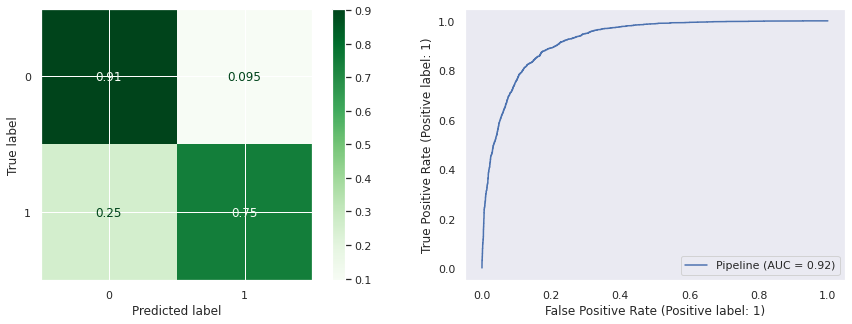

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1723
           1       0.78      0.71      0.74       777

    accuracy                           0.85      2500
   macro avg       0.83      0.81      0.82      2500
weighted avg       0.84      0.85      0.84      2500



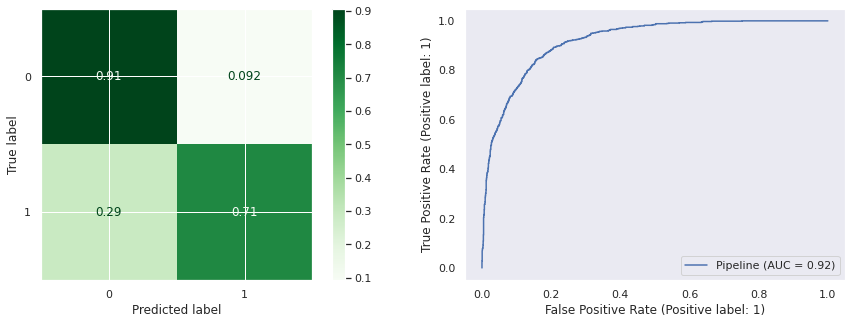

CPU times: user 1.32 s, sys: 507 ms, total: 1.83 s
Wall time: 1.37 s


In [63]:
%%time

# Logistic Regression

log_reg = LogisticRegression()
log_reg_pipe = make_pipeline(preprocessor, log_reg)
log_reg_pipe.fit(X_train, y_train)
evaluate_classiffication(log_reg_pipe, X_train, y_train, label="Train Data")
evaluate_classiffication(log_reg_pipe, X_test, y_test, label="Test Data")

In [64]:
#RandomOverSampler
smote = SMOTE()

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1723
           1       0.70      0.85      0.77       777

    accuracy                           0.84      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.86      0.84      0.84      2500



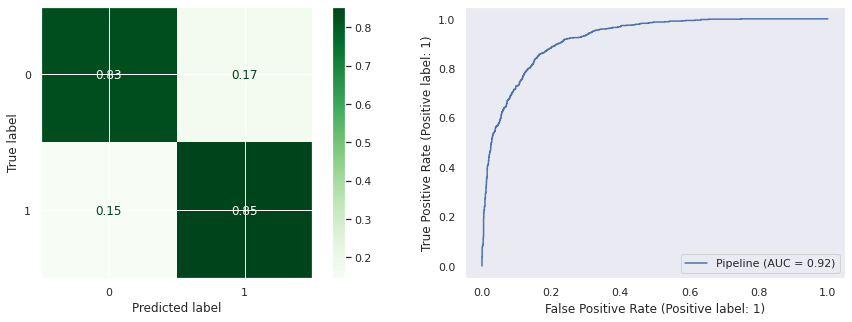

In [65]:
# Logistic Regression

log_reg = LogisticRegression()
log_reg_pipe = make_pipeline(preprocessor, smote, log_reg)
log_reg_pipe.fit(X_train, y_train)
evaluate_classiffication(log_reg_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1723
           1       0.69      0.86      0.77       777

    accuracy                           0.84      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.86      0.84      0.84      2500



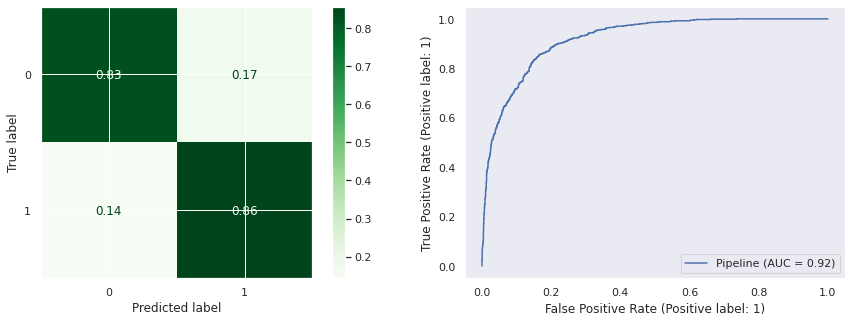

In [66]:
# Logistic Regression

log_reg = LogisticRegression()
log_reg_pipe = make_pipeline(preprocessor, RandomOverSampler(), log_reg)
log_reg_pipe.fit(X_train, y_train)
evaluate_classiffication(log_reg_pipe, X_test, y_test, label="Test Data")

{0.01: 0.8228,
 0.1: 0.836,
 1: 0.838,
 10: 0.838,
 100: 0.8384,
 1000: 0.8404,
 10000: 0.8364}

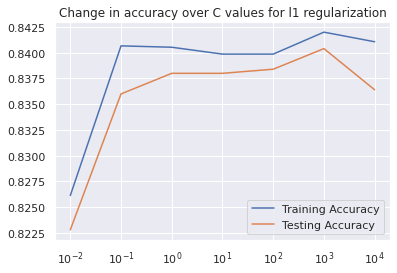

In [67]:
# We will start tuning L1 first

# create a list of c values and empty lists for scores
c_values = [0.01, 0.1, 1, 10, 100, 1000, 10000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg_tune1 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_tune1_pipe = make_pipeline(preprocessor, RandomOverSampler(), log_reg_tune1)
  log_reg_tune1_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_tune1_pipe.score(X_train, y_train))
  test_scores.append(log_reg_tune1_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.7592,
 0.001: 0.8028,
 0.01: 0.8292,
 0.1: 0.8352,
 1: 0.8352,
 10: 0.8388,
 100: 0.8388,
 1000: 0.8412}

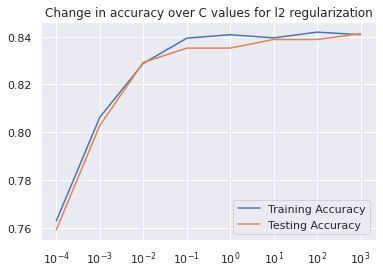

In [68]:
# Tune L2

# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg_tune2 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_tune2_pipe = make_pipeline(preprocessor, RandomOverSampler(), log_reg_tune2)
  log_reg_tune2_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_tune2_pipe.score(X_train, y_train))
  test_scores.append(log_reg_tune2_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

Original Log Reg Untuned
------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1723
           1       0.69      0.86      0.77       777

    accuracy                           0.84      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.86      0.84      0.84      2500



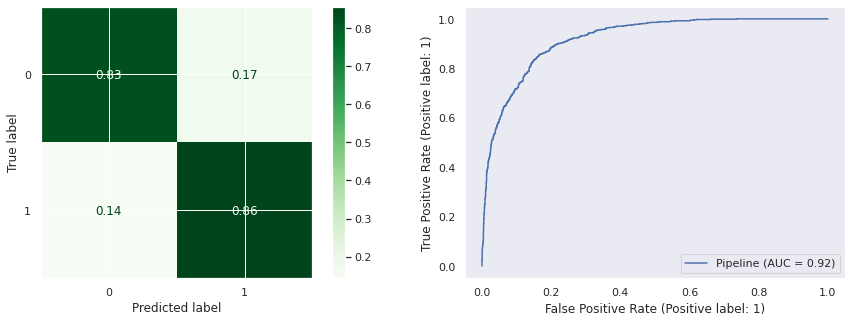

Best Log Reg Tuned
------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1723
           1       0.70      0.85      0.77       777

    accuracy                           0.84      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.85      0.84      0.84      2500



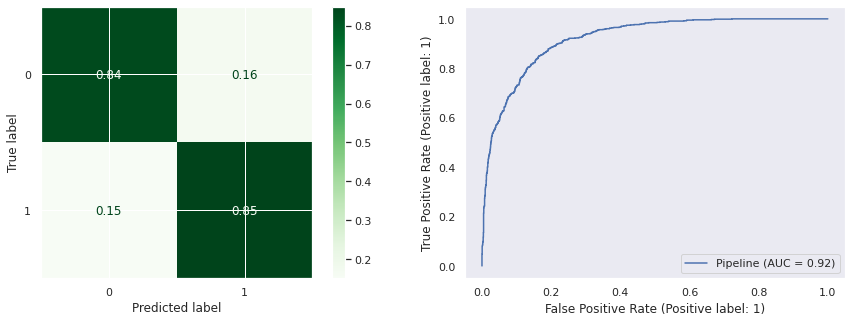

CPU times: user 1.35 s, sys: 520 ms, total: 1.87 s
Wall time: 1.37 s


In [69]:
%%time
log_reg_best = LogisticRegression(C=10, max_iter=1000, solver='liblinear', penalty='l1')
log_reg_best_pipe = make_pipeline(preprocessor, smote, log_reg_best)
log_reg_best_pipe.fit(X_train, y_train)
print("Original Log Reg Untuned")
evaluate_classiffication(log_reg_pipe, X_test, y_test, label="Test Data")
print("Best Log Reg Tuned")
evaluate_classiffication(log_reg_best_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5144
           1       1.00      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



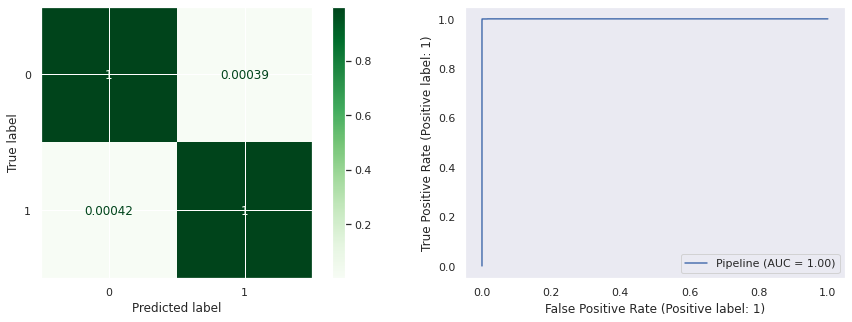

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1723
           1       0.76      0.69      0.72       777

    accuracy                           0.84      2500
   macro avg       0.81      0.79      0.80      2500
weighted avg       0.83      0.84      0.83      2500



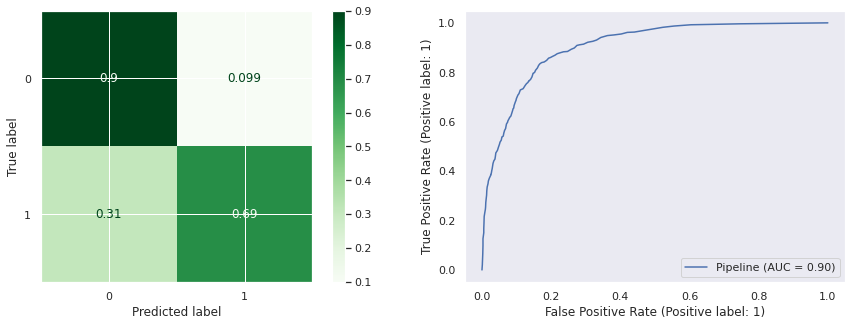

CPU times: user 2.17 s, sys: 30.8 ms, total: 2.2 s
Wall time: 2.18 s


In [70]:
%%time
# fit and evaluate a RandomForestClassifier
rf = RandomForestClassifier()
rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe.fit(X_train, y_train)
evaluate_classiffication(rf_pipe, X_train, y_train, label="Train Data")
evaluate_classiffication(rf_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1723
           1       0.74      0.73      0.74       777

    accuracy                           0.84      2500
   macro avg       0.81      0.81      0.81      2500
weighted avg       0.84      0.84      0.84      2500



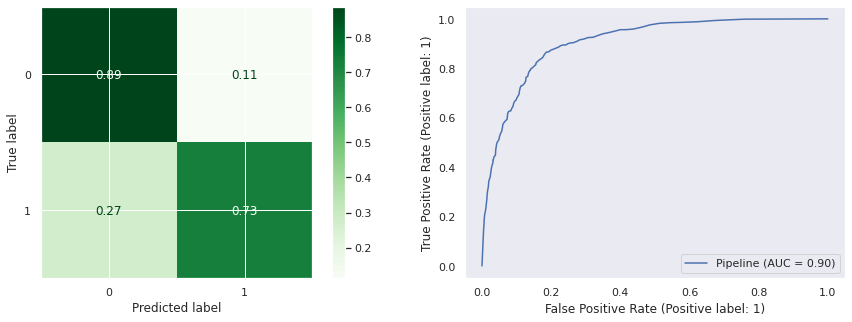

In [71]:
# fit and evaluate a RandomForestClassifier
rf = RandomForestClassifier()
rf_pipe = make_pipeline(preprocessor, smote, rf)
rf_pipe.fit(X_train, y_train)
evaluate_classiffication(rf_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1723
           1       0.73      0.73      0.73       777

    accuracy                           0.83      2500
   macro avg       0.80      0.80      0.80      2500
weighted avg       0.83      0.83      0.83      2500



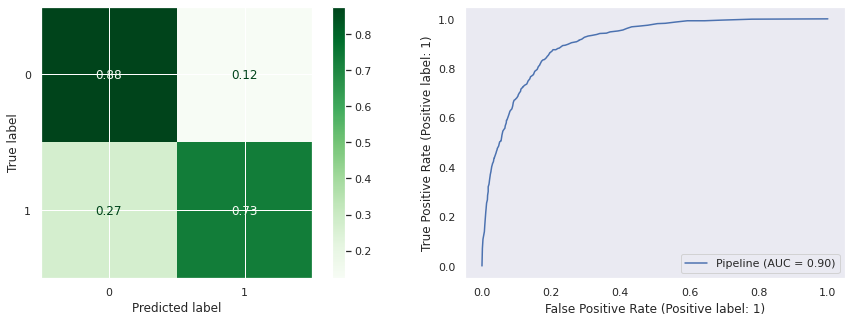

In [72]:
# fit and evaluate a RandomForestClassifier
rf = RandomForestClassifier()
rf_pipe = make_pipeline(preprocessor, RandomOverSampler(), rf)
rf_pipe.fit(X_train, y_train)
evaluate_classiffication(rf_pipe, X_test, y_test, label="Test Data")

In [73]:
rf_tune = RandomForestClassifier()
rf_tune_pipe = make_pipeline(preprocessor, RandomOverSampler(), rf_tune)

In [74]:
rf_tune_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff47d44f190>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                 

In [75]:
#create and visualize our parameter grid
param_grid = {'randomforestclassifier__max_depth': [20,30,40],
              'randomforestclassifier__n_estimators': [10,90, 100, 110],
              'randomforestclassifier__min_samples_leaf': [1,2,3],
              'randomforestclassifier__min_samples_split': [1,2,3]
              }

# I ran this a few times and tinkered with the params

In [76]:
model = rf_tune_pipe  
rf_tune_pipe_grid_search = GridSearchCV(model, param_grid)   

In [77]:
%%time
rf_tune_pipe_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-p

CPU times: user 3min 44s, sys: 641 ms, total: 3min 45s
Wall time: 3min 45s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff47d44f190>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='mos...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff47d4bd390>)])),
                                       ('randomoversampler',
                                        RandomOverSampler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [20, 30, 40],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 3],
                         'randomforestclassifier__min_samples_split': [1, 2, 3],
                         'randomforestclassifier__n_estimators': [10, 90, 100,
                                                                  110]})

In [78]:


#retrieve the best version of the model
best_model_rf = rf_tune_pipe_grid_search.best_estimator_

#refit the model on the whole training set
best_model_rf.fit(X_train, y_train)

#score the model on the test set
best_model_rf.score(X_test, y_test)

0.8376

In [79]:
best_model_rf.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff47c82d610>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                 

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1723
           1       0.72      0.78      0.75       777

    accuracy                           0.84      2500
   macro avg       0.81      0.82      0.81      2500
weighted avg       0.84      0.84      0.84      2500



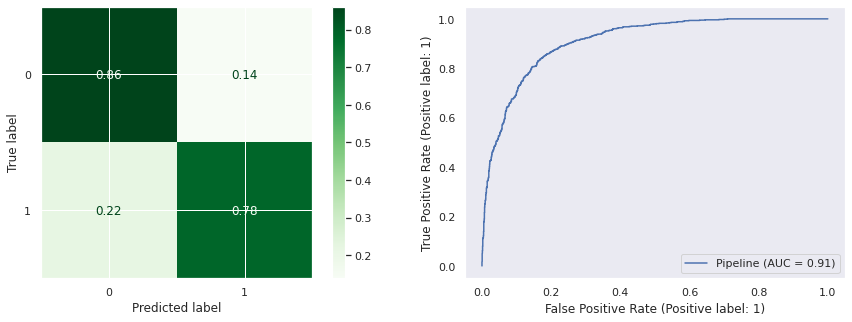

In [80]:
evaluate_classiffication(best_model_rf, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1723
           1       0.73      0.67      0.70       777

    accuracy                           0.82      2500
   macro avg       0.80      0.78      0.79      2500
weighted avg       0.82      0.82      0.82      2500



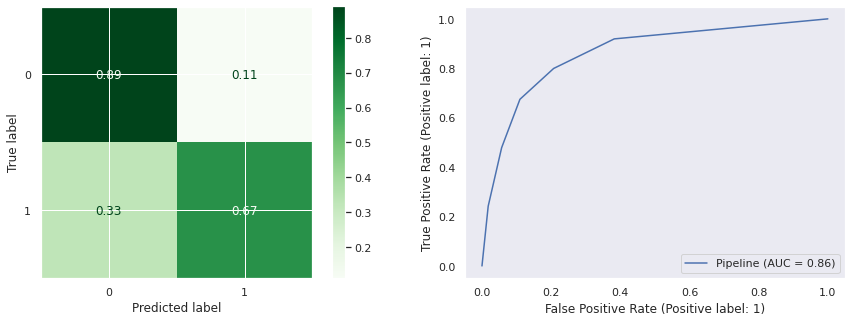

In [81]:
# fit and evaluate a KNeighborsClassifier
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(X_train, y_train)
#evaluate_classiffication(knn_pipe, X_train, y_train, label="Train Data")
evaluate_classiffication(knn_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1723
           1       0.63      0.79      0.70       777

    accuracy                           0.79      2500
   macro avg       0.76      0.79      0.77      2500
weighted avg       0.81      0.79      0.80      2500



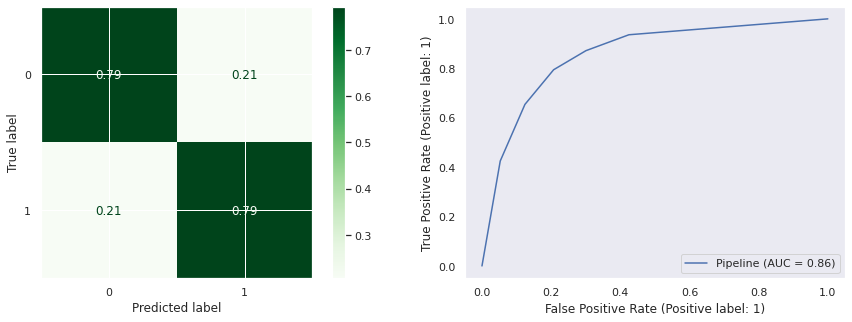

In [82]:
# fit and evaluate a KNeighborsClassifier
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, smote, knn)
knn_pipe.fit(X_train, y_train)
evaluate_classiffication(knn_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1723
           1       0.62      0.78      0.69       777

    accuracy                           0.79      2500
   macro avg       0.76      0.79      0.77      2500
weighted avg       0.81      0.79      0.79      2500



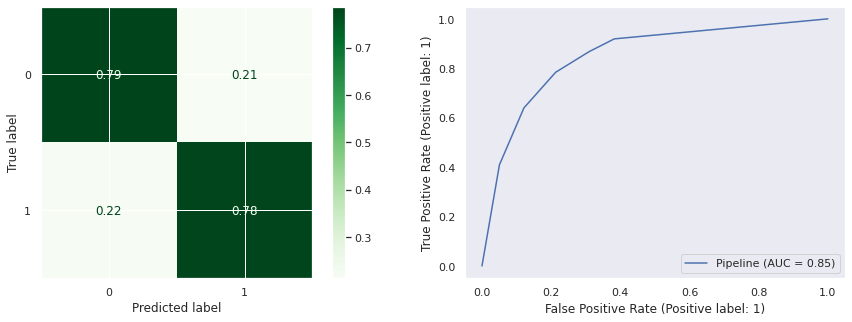

In [83]:
# fit and evaluate a KNeighborsClassifier
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, RandomOverSampler(), knn)
knn_pipe.fit(X_train, y_train)
evaluate_classiffication(knn_pipe, X_test, y_test, label="Test Data")

In [84]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff47d44f190>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                 

In [85]:
%%time

num_neighbors = range(3,7)
leaves = range(28,32)

scores2 = pd.DataFrame(index=num_neighbors, columns=['Test Score','Train Score'])

for neighbors in num_neighbors: 
  for leaf in leaves:

    model = KNeighborsClassifier(n_neighbors=neighbors,leaf_size=leaf, p=2  )
    knn_pipe_tune = make_pipeline(preprocessor, smote, model)
    knn_pipe_tune.fit(X_train, y_train)

    acc_score_train2 = knn_pipe_tune.score(X_train, y_train)
    acc_score_test2 = knn_pipe_tune.score(X_test, y_test)


    scores2.loc[neighbors, 'Train Score'] = acc_score_train2
    scores2.loc[neighbors, 'Test Score'] = acc_score_test2
    scores2.head()


#print("Best KNN Tuned")
evaluate_classiffication(knn_pipe_best, X_test, y_test, label="Test Data")


NameError: ignored

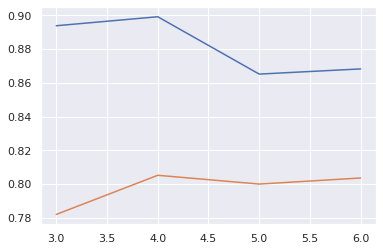

In [86]:
import matplotlib.pyplot as plt


plt.plot(scores2['Train Score']);
plt.plot(scores2['Test Score']);

In [87]:
sorted_scores = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

Test Score Train Score
4     0.8052      0.8992
6     0.8036    0.868267
5        0.8      0.8652
3      0.782    0.893867

In [88]:
model = KNeighborsClassifier(n_neighbors=4,leaf_size=30, p=2  )
knn_pipe_best = make_pipeline(preprocessor, smote, model)
knn_pipe_best.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff47d44f190>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff47d4bd390>)])),
                ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=4))])

Original KNN Untuned
------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1723
           1       0.62      0.78      0.69       777

    accuracy                           0.79      2500
   macro avg       0.76      0.79      0.77      2500
weighted avg       0.81      0.79      0.79      2500



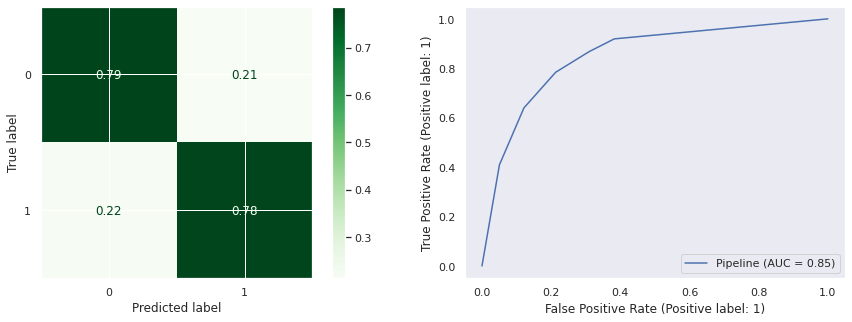

Best KNN Tuned
------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1723
           1       0.67      0.70      0.68       777

    accuracy                           0.80      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.80      0.80      0.80      2500



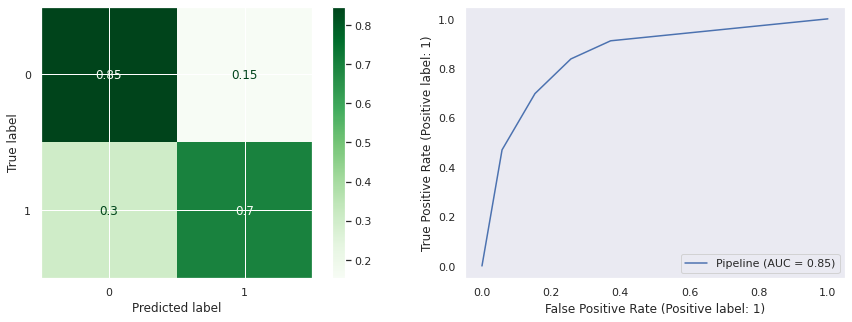

In [89]:
print("Original KNN Untuned")
evaluate_classiffication(knn_pipe, X_test, y_test, label="Test Data")
print("Best KNN Tuned")
evaluate_classiffication(knn_pipe_best, X_test, y_test, label="Test Data")

In [90]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [91]:
#Import RandomOverSampling
from imblearn.over_sampling import RandomOverSampler
#Create an oversampling pipeline
over_sampler = RandomOverSampler()

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1723
           1       0.77      0.72      0.74       777

    accuracy                           0.85      2500
   macro avg       0.83      0.81      0.82      2500
weighted avg       0.84      0.85      0.85      2500



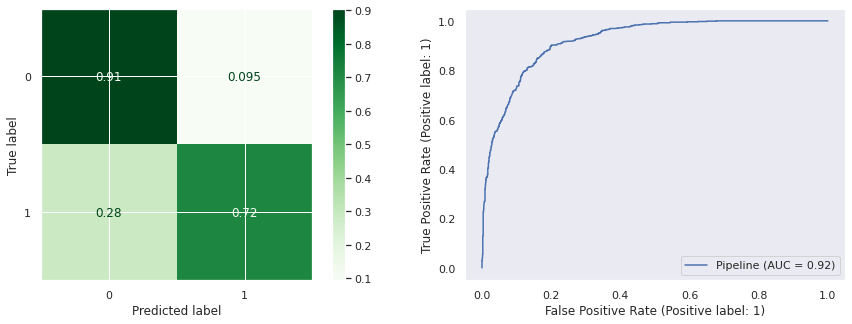

CPU times: user 1.07 s, sys: 29.3 ms, total: 1.1 s
Wall time: 1.27 s


In [92]:
%%time
# Instantiate and fit gradient boosting classifier

xgb = XGBClassifier()
xgb_pipe = make_pipeline(preprocessor, xgb)
xgb_pipe.fit(X_train, y_train)
evaluate_classiffication(xgb_pipe, X_test, y_test, label="Test Data")
#evaluate_classiffication(xgb_pipe, X_train, y_train, label="Train Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1723
           1       0.72      0.80      0.76       777

    accuracy                           0.84      2500
   macro avg       0.82      0.83      0.82      2500
weighted avg       0.85      0.84      0.85      2500



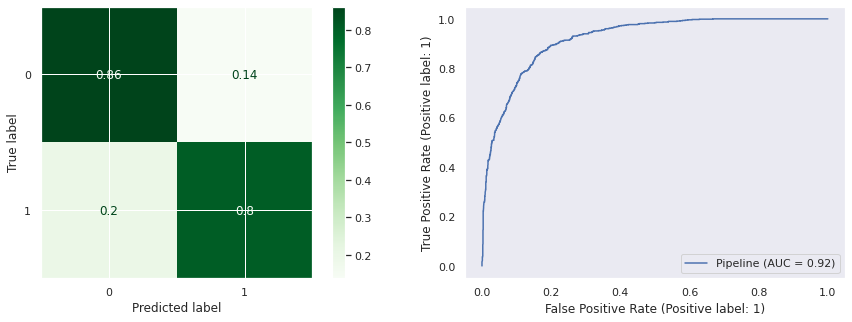

CPU times: user 1.41 s, sys: 112 ms, total: 1.52 s
Wall time: 1.41 s


In [93]:
%%time
# Instantiate and fit gradient boosting classifier

xgb = XGBClassifier()
xgb_pipe = make_pipeline(preprocessor, smote, xgb)
xgb_pipe.fit(X_train, y_train)
evaluate_classiffication(xgb_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1723
           1       0.69      0.84      0.76       777

    accuracy                           0.84      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.85      0.84      0.84      2500



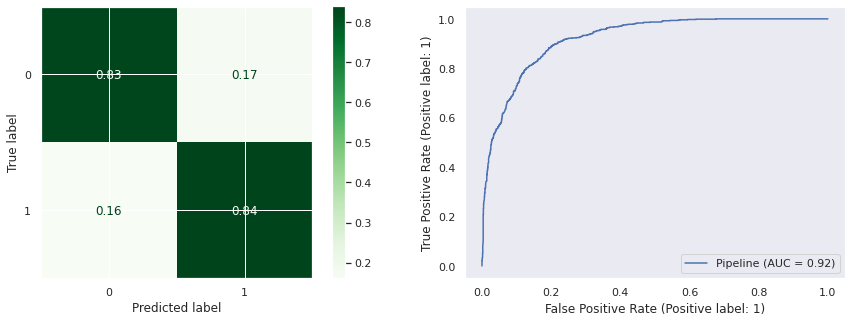

CPU times: user 1.24 s, sys: 12.1 ms, total: 1.26 s
Wall time: 1.26 s


In [94]:
%%time
# Instantiate and fit gradient boosting classifier

xgb = XGBClassifier()
xgb_pipe_over = make_pipeline(preprocessor, over_sampler, xgb)
xgb_pipe_over.fit(X_train, y_train)
evaluate_classiffication(xgb_pipe_over, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1723
           1       0.76      0.74      0.75       777

    accuracy                           0.85      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.85      0.85      0.85      2500



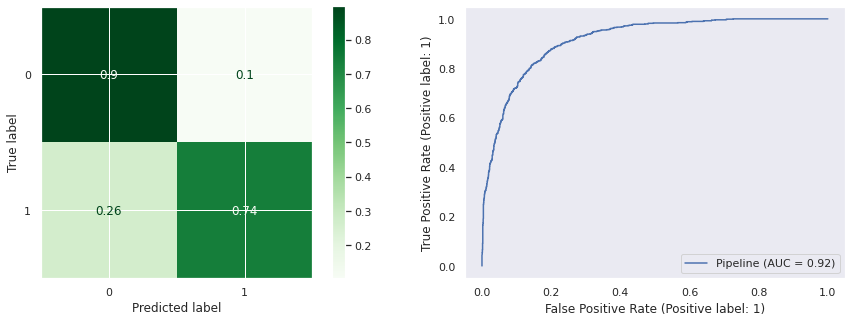

CPU times: user 741 ms, sys: 17.8 ms, total: 759 ms
Wall time: 789 ms


In [95]:
%%time
# Instantiate and fit gradient boosting classifier

lgbm = LGBMClassifier()

lgbm_pipe = make_pipeline(preprocessor,lgbm)
lgbm_pipe.fit(X_train, y_train)
evaluate_classiffication(lgbm_pipe, X_test, y_test, label="Test Data")
#evaluate_classiffication(lgbm_pipe, X_train, y_train, label="Train Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1723
           1       0.73      0.76      0.75       777

    accuracy                           0.84      2500
   macro avg       0.81      0.82      0.82      2500
weighted avg       0.84      0.84      0.84      2500



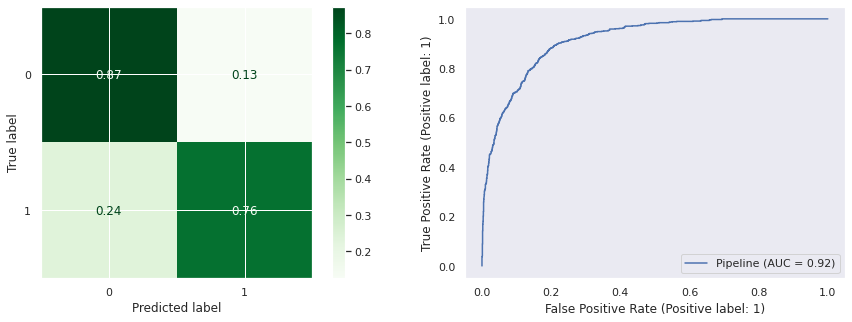

CPU times: user 1.14 s, sys: 127 ms, total: 1.26 s
Wall time: 1.15 s


In [96]:
%%time
# Instantiate and fit gradient boosting classifier

lgbm = LGBMClassifier()

lgbm_pipe = make_pipeline(preprocessor,smote, lgbm)
lgbm_pipe.fit(X_train, y_train)
evaluate_classiffication(lgbm_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1723
           1       0.71      0.82      0.76       777

    accuracy                           0.84      2500
   macro avg       0.81      0.83      0.82      2500
weighted avg       0.85      0.84      0.84      2500



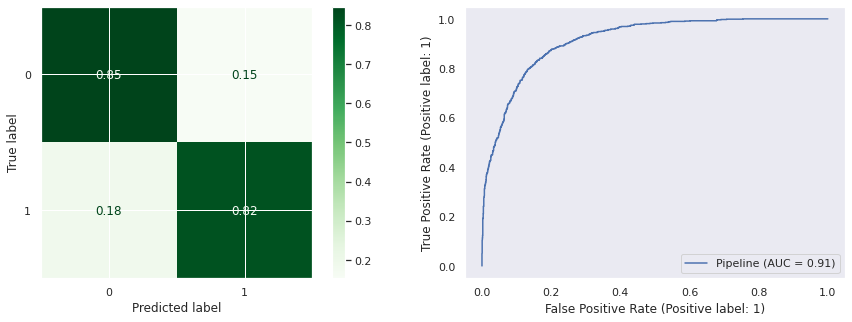

CPU times: user 816 ms, sys: 20.2 ms, total: 836 ms
Wall time: 832 ms


In [97]:
%%time
# Instantiate and fit gradient boosting classifier

lgbm = LGBMClassifier()

lgbm_pipe_over = make_pipeline(preprocessor,over_sampler, lgbm)
lgbm_pipe_over.fit(X_train, y_train)
evaluate_classiffication(lgbm_pipe_over, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1723
           1       0.77      0.72      0.74       777

    accuracy                           0.85      2500
   macro avg       0.82      0.81      0.82      2500
weighted avg       0.84      0.85      0.84      2500



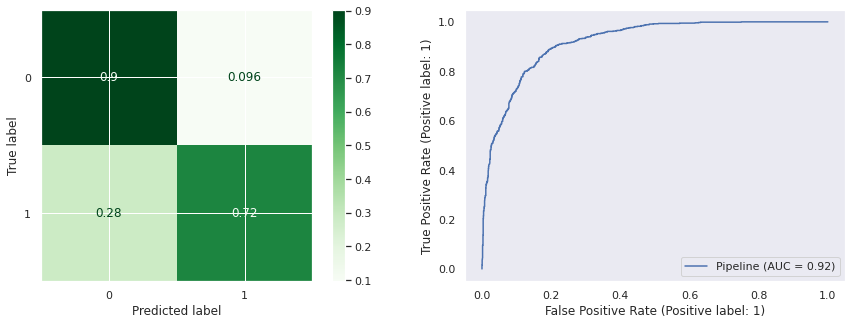

CPU times: user 1.97 s, sys: 29.2 ms, total: 2 s
Wall time: 2 s


In [98]:
%%time
# Instantiate and fit gradient boosting classifier
gbc = GradientBoostingClassifier()

gbc_pipe = make_pipeline(preprocessor, gbc)
gbc_pipe.fit(X_train, y_train)
evaluate_classiffication(gbc_pipe, X_test, y_test, label="Test Data")
#evaluate_classiffication(gbc_pipe, X_train, y_train, label="Train Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1723
           1       0.77      0.72      0.74       777

    accuracy                           0.85      2500
   macro avg       0.82      0.81      0.82      2500
weighted avg       0.84      0.85      0.84      2500



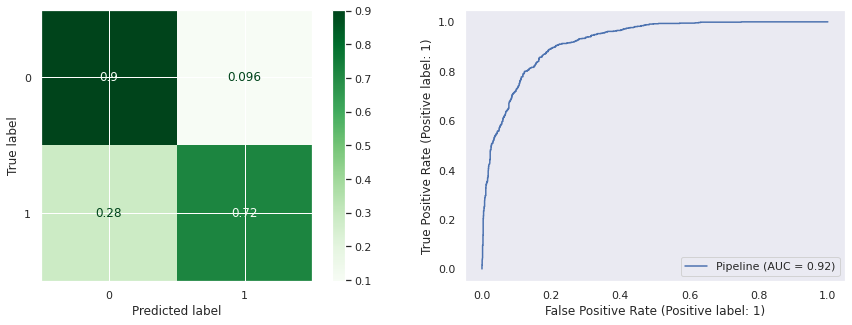

CPU times: user 1.49 s, sys: 7.16 ms, total: 1.49 s
Wall time: 1.5 s


In [99]:
%%time
# Instantiate and fit gradient boosting classifier
gbc = GradientBoostingClassifier()

gbc_pipe = make_pipeline(preprocessor, gbc)
gbc_pipe.fit(X_train, y_train)
evaluate_classiffication(gbc_pipe, X_test, y_test, label="Test Data")
#evaluate_classiffication(gbc_pipe, X_train, y_train, label="Train Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1723
           1       0.70      0.84      0.77       777

    accuracy                           0.84      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.85      0.84      0.84      2500



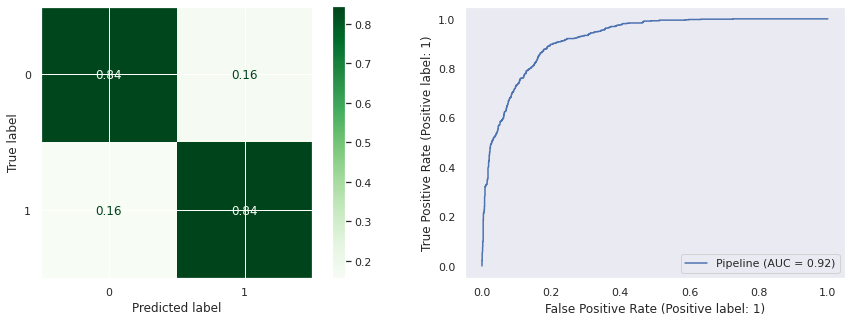

CPU times: user 1.77 s, sys: 12.9 ms, total: 1.79 s
Wall time: 1.79 s


In [100]:
%%time
# Instantiate and fit gradient boosting classifier
gbc = GradientBoostingClassifier()

gbc_pipe_over = make_pipeline(preprocessor, over_sampler,gbc)
gbc_pipe_over.fit(X_train, y_train)
evaluate_classiffication(gbc_pipe_over, X_test, y_test, label="Test Data")
#evaluate_classiffication(gbc_pipe_over, X_train, y_train, label="Train Data")

In [101]:
gbc_pipe_over.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff47d44f190>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                 

In [102]:
#create and visualize our parameter grid
param_grid = {'gradientboostingclassifier__max_depth': [2,3,4],
              'gradientboostingclassifier__min_samples_split': [1,2,3],
              'gradientboostingclassifier__n_estimators': [90,100,110]
              }


In [103]:
model = gbc_pipe_over
gbc_pipe_over_grid_search = GridSearchCV(model, param_grid)  

In [104]:
%%time
# Instantiate and fit gradient boosting classifier
gbc_pipe_over_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_

CPU times: user 1min 35s, sys: 67.3 ms, total: 1min 35s
Wall time: 1min 34s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff47d44f190>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='mos...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff47d4bd390>)])),
                                       ('randomoversampler',
                                        RandomOverSampler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             param_grid={'gradientboostingclassifier__max_depth': [2, 3, 4],
                         'gradientboostingclassifier__min_samples_split': [1, 2,
                                                                           3],
                         'gradientboostingclassifier__n_estimators': [90, 100,
                                                                      110]})

In [105]:
#retrieve the best version of the model
best_model_gbc = gbc_pipe_over_grid_search.best_estimator_

#refit the model on the whole training set
best_model_gbc.fit(X_train, y_train)

#score the model on the test set
best_model_gbc.score(X_test, y_test)

best_model_gbc.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff47bffd6d0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                 

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.84      0.87      1723
           1       0.69      0.83      0.76       777

    accuracy                           0.83      2500
   macro avg       0.81      0.83      0.82      2500
weighted avg       0.85      0.83      0.84      2500



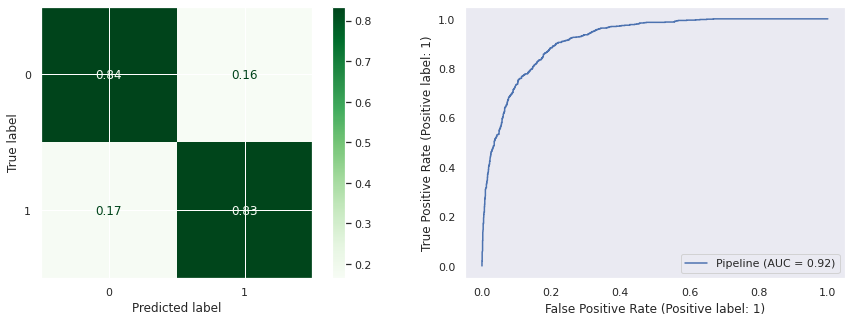

In [106]:
evaluate_classiffication(best_model_gbc, X_test, y_test, label="Test Data")
#evaluate_classiffication(best_model_gbc, X_train, y_train, label="Train Data")

Best Log Reg Tuned
------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1723
           1       0.70      0.85      0.77       777

    accuracy                           0.84      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.85      0.84      0.84      2500



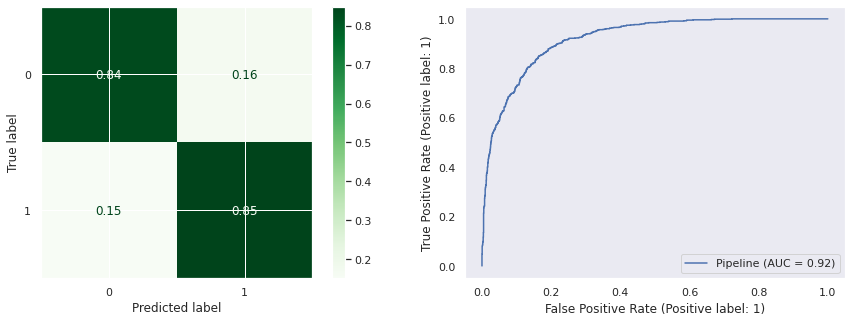

Best Random Forest Tuned
------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1723
           1       0.72      0.78      0.75       777

    accuracy                           0.84      2500
   macro avg       0.81      0.82      0.81      2500
weighted avg       0.84      0.84      0.84      2500



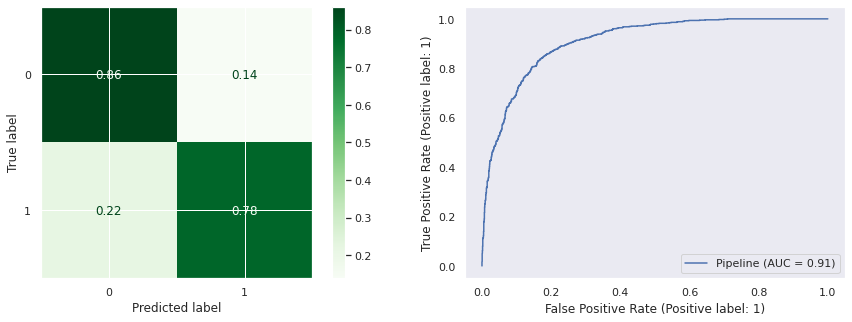

Best KNN Tuned
------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1723
           1       0.67      0.70      0.68       777

    accuracy                           0.80      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.80      0.80      0.80      2500



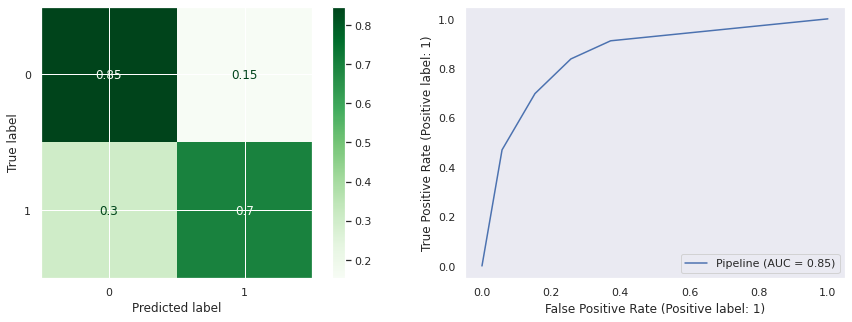

In [107]:
print("Best Log Reg Tuned")
evaluate_classiffication(log_reg_best_pipe, X_test, y_test, label="Test Data")
print("Best Random Forest Tuned")
evaluate_classiffication(best_model_rf, X_test, y_test, label="Test Data")
print("Best KNN Tuned")
evaluate_classiffication(knn_pipe_best, X_test, y_test, label="Test Data")


------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1723
           1       0.69      0.84      0.76       777

    accuracy                           0.84      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.85      0.84      0.84      2500



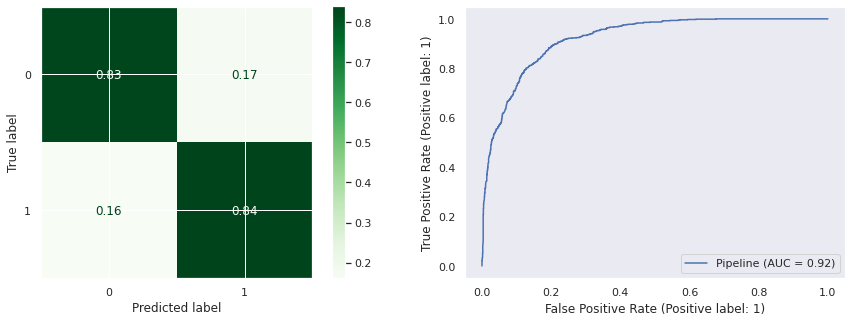

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1723
           1       0.71      0.82      0.76       777

    accuracy                           0.84      2500
   macro avg       0.81      0.83      0.82      2500
weighted avg       0.85      0.84      0.84      2500



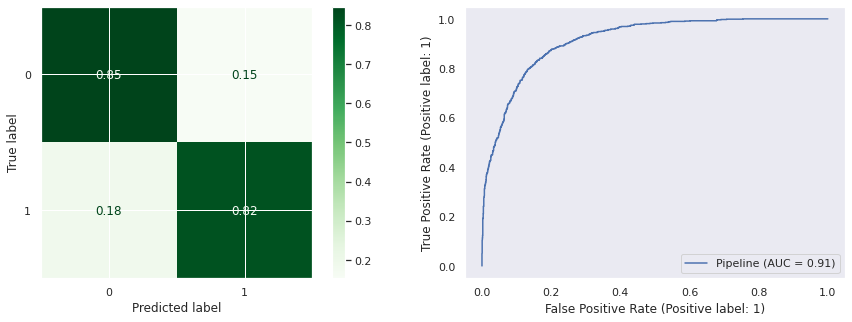

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1723
           1       0.70      0.84      0.77       777

    accuracy                           0.84      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.85      0.84      0.84      2500



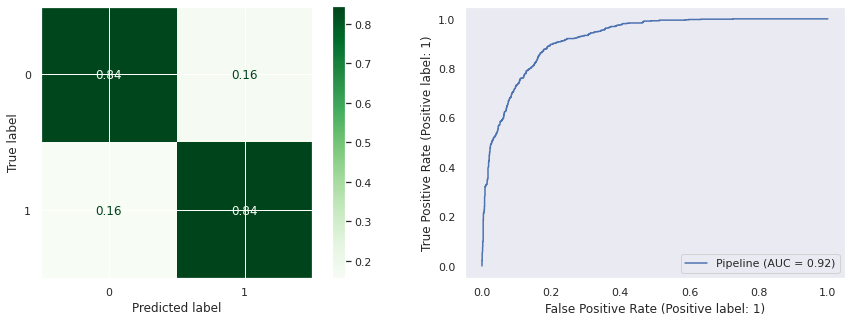

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.84      0.87      1723
           1       0.69      0.83      0.76       777

    accuracy                           0.83      2500
   macro avg       0.81      0.83      0.82      2500
weighted avg       0.85      0.83      0.84      2500



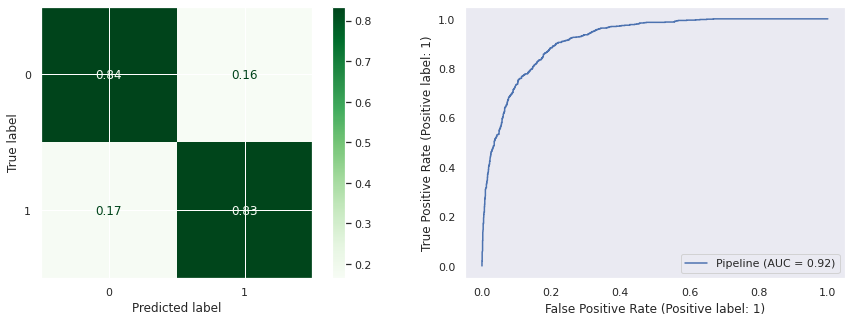

In [108]:
evaluate_classiffication(xgb_pipe_over, X_test, y_test, label="Test Data")
evaluate_classiffication(lgbm_pipe_over, X_test, y_test, label="Test Data")
evaluate_classiffication(gbc_pipe_over, X_test,  y_test, label="Train Data")
evaluate_classiffication(best_model_gbc, X_test, y_test, label="Test Data")


# Clustering

In [109]:
# Imports
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [110]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  int64  
 1   GENDER               10000 non-null  int64  
 2   RACE                 10000 non-null  int64  
 3   DRIVING_EXPERIENCE   10000 non-null  int64  
 4   EDUCATION            10000 non-null  int64  
 5   INCOME               10000 non-null  int64  
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  int64  
 8   VEHICLE_YEAR         10000 non-null  int64  
 9   MARRIED              10000 non-null  int64  
 10  CHILDREN             10000 non-null  int64  
 11  POSTAL_CODE          10000 non-null  object 
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  int64  
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

In [111]:
fill_credit_score(df_ml)
fill_mileage(df_ml)


In [112]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  int64  
 1   GENDER               10000 non-null  int64  
 2   RACE                 10000 non-null  int64  
 3   DRIVING_EXPERIENCE   10000 non-null  int64  
 4   EDUCATION            10000 non-null  int64  
 5   INCOME               10000 non-null  int64  
 6   CREDIT_SCORE         10000 non-null  float64
 7   VEHICLE_OWNERSHIP    10000 non-null  int64  
 8   VEHICLE_YEAR         10000 non-null  int64  
 9   MARRIED              10000 non-null  int64  
 10  CHILDREN             10000 non-null  int64  
 11  POSTAL_CODE          10000 non-null  object 
 12  ANNUAL_MILEAGE       9998 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  int64  
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

In [113]:
#instantiate the StandardScaler, OneHotEncoder, and Imputers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
# Setup the pipelines for the numeric and categorical data

num_pipeline = make_pipeline(mean_imputer, scaler)
nom_pipeline = make_pipeline(freq_imputer, ohe)

# Selectors
num_selector = make_column_selector(dtype_include='number')
nom_selector = make_column_selector(dtype_include='object')

# Setup the tuples to pair the processors with the make column selectors

numeric_tuple = (num_pipeline, num_selector)
nominal_tuple = (nom_pipeline, nom_selector)

# Instantiate the make column transformer
preprocessor = make_column_transformer(numeric_tuple,
                                       nominal_tuple,
                                       remainder='drop') 

# Fit the column transformer on the X_train
preprocessor.fit(df_ml)

# Transform the X_train and the X_test

df_ml_transformed = preprocessor.transform(df_ml)

# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(df_ml_transformed).sum().sum(), 'missing values in training data')
print('\n')
print('All data in df_ml_transformed are', df_ml_transformed.dtype)
print('\n')
print('shape of data is', df_ml_transformed.shape)
print('\n')
df_ml_transformed

0 missing values in training data


All data in df_ml_transformed are float64


shape of data is (10000, 21)




array([[ 1.4733327 ,  0.998002  , -0.33110663, ...,  0.        ,
         0.        ,  0.        ],
       [-1.45284943, -1.002002  , -0.33110663, ...,  0.        ,
         0.        ,  0.        ],
       [-1.45284943,  0.998002  , -0.33110663, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.47745538, -1.002002  , -0.33110663, ...,  0.        ,
         0.        ,  0.        ],
       [-0.47745538,  0.998002  , -0.33110663, ...,  0.        ,
         0.        ,  0.        ],
       [-0.47745538,  0.998002  , -0.33110663, ...,  0.        ,
         0.        ,  0.        ]])

In [114]:
min_samples = 30
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors.fit(df_ml_transformed)
distances, indices = neighbors.kneighbors(df_ml_transformed)
distances[:5]

array([[0.        , 0.07552372, 0.40251015, 0.40437366, 0.41389858,
        0.55607902, 0.70712598, 0.77285414, 0.83994829, 0.97143537,
        1.02675657, 1.04936717, 1.07104101, 1.07576619, 1.10283121,
        1.1281482 , 1.13097657, 1.14735431, 1.1751562 , 1.23618886,
        1.25295371, 1.27759598, 1.31332703, 1.33308328, 1.37978097,
        1.38633327, 1.40826005, 1.41155657, 1.41537311, 1.422831  ],
       [0.        , 0.04382093, 0.36186543, 0.37155305, 0.37681864,
        0.37681864, 0.38236542, 0.41165419, 0.47772302, 0.52083778,
        0.5611934 , 0.62013794, 0.6371238 , 0.67580143, 0.73715471,
        0.74082539, 0.74082539, 0.76867631, 0.76904846, 0.79437423,
        0.80818323, 0.84715562, 0.86047497, 0.87725172, 0.89968192,
        0.98911809, 1.06491569, 1.06953336, 1.07175881, 1.08615345],
       [0.        , 0.45373658, 0.60212567, 0.70284043, 0.71747194,
        0.75494091, 0.89028575, 0.9457178 , 0.94760534, 1.04291653,
        1.12848523, 1.14652574, 1.17543741, 1.

In [115]:
sorted_distances = np.sort(distances[:, min_samples-1])

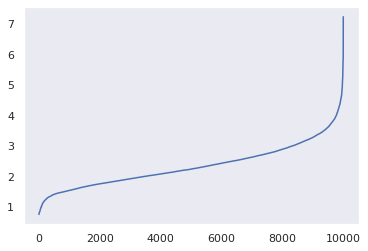

In [116]:
plt.plot(sorted_distances)
plt.grid();

In [117]:
# Instantiate & fit clustering - this is done in one step for DBSCAN
dbs = DBSCAN(eps = 3.0
             , min_samples = min_samples).fit(df_ml_transformed)

dbs.labels_

array([0, 1, 0, ..., 0, 1, 0])

In [118]:
df_ml['cluster'] = dbs.labels_

In [119]:
cluster_groups = df_ml.groupby('cluster', as_index=False).mean()
cluster_groups

cluster       AGE    GENDER      RACE  DRIVING_EXPERIENCE  EDUCATION  \
0       -1  1.753012  0.355422  0.349398            1.441767   1.138554   
1        0  1.672284  0.500751  0.000000            1.201402   1.338895   
2        1  1.028904  0.509835  0.000000            0.728222   0.961863   
3        2  1.534314  0.642157  0.000000            1.044118   1.338235   
4        3  1.642105  0.503509  1.000000            1.098246   1.091228   
5        4  0.770492  0.590164  1.000000            0.500000   0.536885   

     INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP  VEHICLE_YEAR   MARRIED  \
0  1.857430      0.504337           0.407631      0.305221  0.407631   
1  2.231937      0.545494           1.000000      0.354747  1.000000   
2  1.158571      0.448904           0.000000      0.195102  0.000000   
3  2.254902      0.545092           1.000000      0.303922  1.000000   
4  2.084211      0.532490           1.000000      0.343860  1.000000   
5  0.659836      0.406516           0.000000      0.045082  0.000000   

   CHILDREN  ANNUAL_MILEAGE  VEHICLE_TYPE  SPEEDING_VIOLATIONS      DUIS  \
0  0.666667    11042.498478      0.548193             3.309237  0.706827   
1  0.728183    11536.535732      0.000000             1.648590  0.262640   
2  0.590927    12184.333068      0.000000             0.884384  0.130068   
3  0.759804    11452.408833      1.000000             1.122549  0.098039   
4  0.743860    11580.120428      0.000000             1.343860  0.200000   
5  0.577869    12519.423820      0.000000             0.422131  0.032787   

   PAST_ACCIDENTS   OUTCOME  
0        1.765060  0.353414  
1        1.178041  0.197230  
2        0.698515  0.590927  
3        0.906863  0.112745  
4        1.047368  0.185965  
5        0.418033  0.713115

In [120]:
df_ml['cluster'].value_counts()

 0    5993
 1    2491
 3     570
-1     498
 4     244
 2     204
Name: cluster, dtype: int64

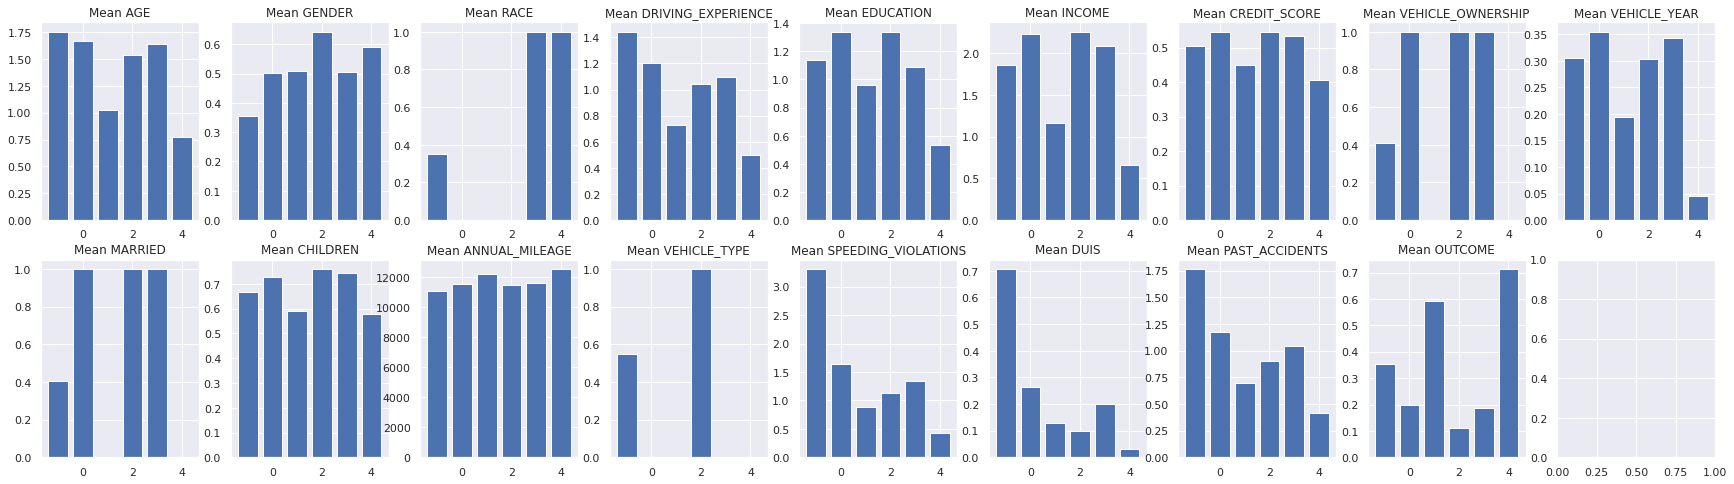

In [121]:
# Visualize means 
fig, axes = plt.subplots(2,9, figsize = (30, 8))
# fig is an array of dimensions 3,3.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

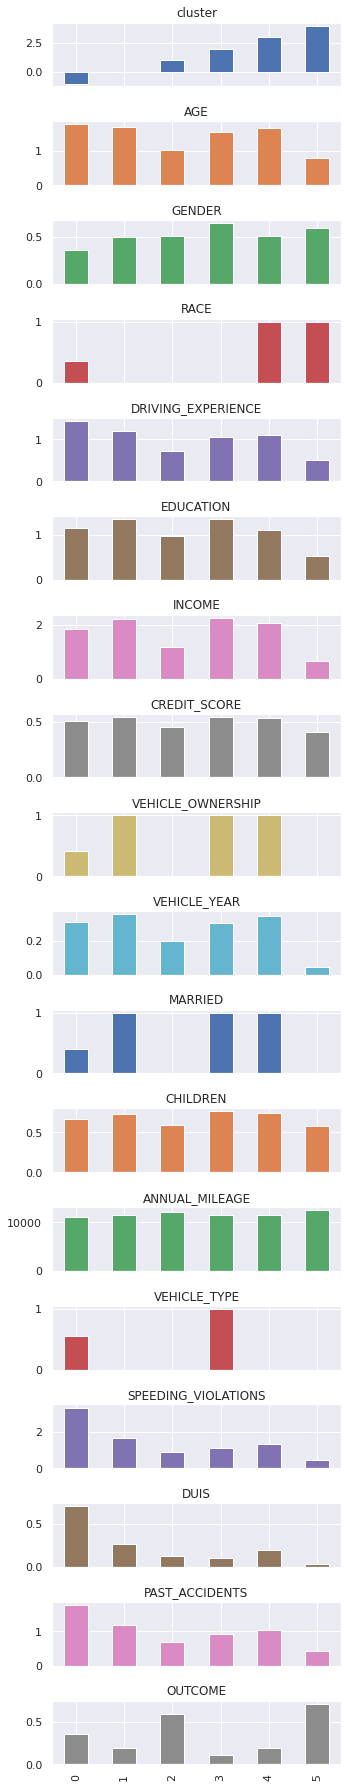

In [122]:
# Use visualizations to explore the statistics for each feature for each cluster.
cluster_groups.plot(subplots=True, kind='bar', figsize=(5,25), legend=False);

plt.tight_layout();

In [123]:
import plotly.express as plotply

In [124]:
plotply.scatter_3d(data_frame=df_ml, x='AGE', y='ANNUAL_MILEAGE', z='CREDIT_SCORE', color = 'OUTCOME')